<h2> Проект "Интернет-магазин «В один клик» - предсказания покупательской активности покупателей интернет-магазина" <a class="tocSkip"></h2>

**Цель проекта**
    
Разработать для интернет-магазина «В один клик» решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.\
Используя предоставленные заказчиком данные необходимо:
- ***построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца;***
- ***включить в исследование дополнительные данные о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца;***
- ***используя данные модели и данные о прибыльности клиентов выделить сегменты покупателей и разработать для них персонализированные предложения.***
    
**План работы**
    
1. Загрузка данных.\
 1.1. Загрузка данных и изучение общей информации о данных.\
 1.2. Оценка данных на предмет их соответствия описанию.
2. Предобработка данных.\
 2.1. Оценка корректности названий столбцов.\
 2.2. Выявление пропусков в данных.\
 2.3. Выявление дубликатов в данных.
3. Исследовательский анализ данных.\
 3.1. Статистический анализ признаков.\
 3.2. Построение графиков для признаков.\
 3.3. Отбор клиентов с покупательской активностью не менее трёх месяцев.
4. Объединение таблиц.\
 4.1 Создание отдельных столбцов для данных о выручке и времени на сайте для каждого периода.\
 4.2 Объединение таблиц 'market_file.csv', 'market_money.csv', 'market_time.csv'.
5. Корреляционный анализ в количественной шкале.
6. Создание пайплайнов.\
 6.1 Обработка количественных и категориальных признаков.\
 6.2 Обучение моделей KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC().\
 6.3 Выбор лучшей модели.
7. Анализ важности признаков для лучшей модели.
8. Сегментация покупателей.\
 8.1 Сегментация покупателей на основе результатов моделирования и данных о прибыльности покупателей.\
 8.2 Графическое и аналитическое исследование отдельной группы покупателей.
9. Общий вывод.

**Описание данных:**
    
***Описание данных датасета 'market_file.csv'*** (содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении):
    
***id*** — номер покупателя в корпоративной базе данных.\
***Покупательская активность*** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».\
***Тип сервиса*** — уровень сервиса.\
***Разрешить сообщать*** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре.\
***Маркет_актив_6_мес*** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев.\
***Маркет_актив_тек_мес*** — количество маркетинговых коммуникаций в текущем месяце.\
***Длительность*** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.\
***Акционные_покупки*** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.\
***Популярная_категория*** — самая популярная категория товаров у покупателя за последние 6 месяцев.\
***Средний_просмотр_категорий_за_визит*** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.\
***Неоплаченные_продукты_штук_квартал*** — общее число неоплаченных товаров в корзине за последние 3 месяца.\
***Ошибка_сервиса*** — число сбоев, которые коснулись покупателя во время посещения сайта.\
***Страниц_за_визит*** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
    
***Описание данных датасета 'market_money.csv'*** (содержит данные о выручке, которую получает магазин с покупателя):

***id*** — номер покупателя в корпоративной базе данных.\
***Период*** — название периода, во время которого зафиксирована выручка.\
***Выручка*** — сумма выручки за период.

***Описание данных датасета 'market_time.csv'*** (содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода):
    
***id*** — номер покупателя в корпоративной базе данных.\
***Период*** — название периода, во время которого зафиксировано общее время.\
***минут*** — значение времени, проведённого на сайте, в минутах.

***Описание данных датасета 'money.csv'*** (содержит данные о среднемесячной прибыли покупателя за последние 3 месяца):
    
***id*** — номер покупателя в корпоративной базе данных.\
***Прибыль*** — значение прибыли.

In [ ]:
# Устанавливаем и импортируем необходимые библиотеки и функции
!pip install shap

!pip install --upgrade numba
!pip install --upgrade seaborn
!pip install --upgrade shap
!pip install -U scikit-learn

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import pylab
import shap

from scipy import stats as st
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from math import factorial
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, mean_absolute_error, accuracy_score, \
recall_score, precision_score, confusion_matrix, roc_auc_score
from IPython.display import display, HTML

     |████████████████████████████████| 540 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 43.8 MB 267 kB/s  eta 0:00:01
     |████████████████████████████████| 18.2 MB 92.8 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.0
    Uninstalling llvmlite-0.39.0:
      Successfully uninstalled llvmlite-0.39.0
  Attempting uninstall: numba
    Found existing installation: numba 0.56.0
    Uninstalling numba-0.56.0:
      Successfully uninstalled numba-0.56.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.4 which is incom

## Загрузка данных

### Загрузка данных и изучение общей информации о данных

In [ ]:
# Считываем CSV-файлы с данными и сохраним их в датафреймы. Для корректного считывания данных из файла 'money.csv' используем
# параметры 'sep' и 'decimal' функции 'pd.read_csv'
data_market_file = pd.read_csv('/datasets/market_file.csv')
data_market_money = pd.read_csv('/datasets/market_money.csv')
data_market_time = pd.read_csv('/datasets/market_time.csv')
data_money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [ ]:
# Изучаем общую информацию о датафреймах
name_of_dataframes = ['<strong>data_market_file</strong>',
                      '<strong>data_market_money</strong>',
                      '<strong>data_market_time</strong>',
                      '<strong>data_money</strong>']
dataframes = [data_market_file, data_market_money, data_market_time, data_money]

for name_of_dataframe, dataframe in zip(name_of_dataframes, dataframes):
    display(HTML(name_of_dataframe))
    dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


### Оценка данных на предмет их соответствия описанию

In [ ]:
# Cмотрим на первые строки датафреймов
for name_of_dataframe, dataframe in zip(name_of_dataframes, dataframes):
    display(HTML(name_of_dataframe))
    display(dataframe.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


*Данные, содержащиеся в датафреймах, имеют корректные форматы и соответсвуют описанию.*

**Вывод по этапу первоначального ознакомления с данными:** Для корректного считывания данных из файла 'money.csv' были использованы параметры 'sep' и 'decimal' функции 'pd.read_csv'. При считывании файлов 'market_file.csv', market_money.csv' и 'market_time.csv' каких-лобо проблем выявлено не было. Данные, содержащиеся в датафреймах, имеют корректные форматы и соответсвуют описанию.

## Предобработка данных

### Оценка корректности названий столбцов

In [ ]:
# Создадим функцию, выводящую на экран перечни названий столбцов датафреймов
def list_of_columns(list_1, list_2):
    for i_1, i_2 in zip(list_1, list_2):
        display(HTML(i_1))
        print(list(i_2))

# Вызывем функцию 'list_of_columns' для вывода на экран перечней названий столбцов датафреймов
list_of_columns(name_of_dataframes, dataframes)

['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Популярная_категория', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит']


['id', 'Период', 'Выручка']


['id', 'Период', 'минут']


['id', 'Прибыль']


*Названия столбцов датафреймов за исключением столбцов 'id' и столбца 'минут' датафрейма 'data_market_time' **не соответствуют стилю написания snake_case:** названия столбцов записаны с прописных букв, а также столбцы 'Покупательская активность', 'Тип сервиса' и 'Разрешить сообщать' датафрейма 'data_market_file' содержат в названиях пробелы.\
Устраним указанные недочеты, при этом для простоты ориентирования в данных оставим названия столбцов русскоязычными.*

In [ ]:
# Устраним пробелы в названиях столбцов 'Покупательская активность', 'Тип сервиса' и 'Разрешить сообщать' датафрейма
# 'data_market_file'
data_market_file.rename(columns={'Покупательская активность':'Покупательская_активность',
                                 'Тип сервиса':'Тип_сервиса',
                                 'Разрешить сообщать':'Разрешить_сообщать'}, inplace=True)

In [ ]:
# Избавимся от прописных букв в названиях столбцов датафреймов
for dataframe in dataframes:
    dataframe.columns = dataframe.columns.str.lower()

In [ ]:
# Вызывем функцию 'list_of_columns' для вывода на экран перечней наименований столбцов датафреймов, чтобы проверить корректно
# ли прошло переименование столбцов датафреймов
list_of_columns(name_of_dataframes, dataframes)

['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'популярная_категория', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит']


['id', 'период', 'выручка']


['id', 'период', 'минут']


['id', 'прибыль']


*Переименование столбцов прошло корректно.*

### Выявление пропусков в данных

In [ ]:
# Создадим функцию, возвращающую количество пропусков в каждом столбце датафрейма
def search_for_passes(list_1, list_2):
    for i_1, i_2 in zip(list_1, list_2):
        display(HTML(i_1))
        print(i_2.isna().sum().sort_values(ascending=False))

# Вызывем функцию 'search_for_passes' для получения сведений о пропусках по каждому столбцу каждого датафрейма
search_for_passes(name_of_dataframes, dataframes)

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64


id         0
период     0
выручка    0
dtype: int64


id        0
период    0
минут     0
dtype: int64


id         0
прибыль    0
dtype: int64


*Данные, содержащиеся в датафреймах, не имеют пропусков.*

### Выявление дубликатов в данных

*Рассмотрим датафреймы на предмет наличия строк-дубликатов.*

In [ ]:
# Создадим функцию, возвращающую количество строк-дубликатов в каждом датафрейме
def search_for_duplicates(list_1, list_2):
    for i_1, i_2 in zip(list_1, list_2):
        display(HTML(i_1))
        print(i_2.duplicated().sum())

# Вызывем функцию 'search_forduplicates' для получения сведений о наличии строк-дубликатов по каждому датафрейму
search_for_duplicates(name_of_dataframes, dataframes)

0


0


0


0


*Данные, содержащиеся в датафреймах, не имеют строк-дубликатов.*

*Рассмотрим датафреймы на предмет наличия неявных дубликатов.*

Исходя из характера содержащихся в столбцах датафреймов данных, неявные дубликаты целесообразно искать в столбцах 'покупательская_активность',	'тип_сервиса',	'разрешить_сообщать' и 'популярная_категория' датафрейма 'data_market_file', а также в столбцах 'период' датафреймов 'data_market_money' и 'data_market_time'.

In [ ]:
# Создадим список столбцов, в которых будем искать неявные дубликаты
list_of_columns_to_find_duplicates = [data_market_file['покупательская_активность'],
                                      data_market_file['тип_сервиса'],
                                      data_market_file['разрешить_сообщать'],
                                      data_market_file['популярная_категория'],
                                      data_market_money['период'],
                                      data_market_time['период']]

# Создадим функцию, врозвращающую все уникальные значения столбца
def search_for_implicit_duplicates(list_of_columns):
    for column in list_of_columns:
        print(column.unique())

# Вызывем функцию, врозвращающую все уникальные значения столбца
search_for_implicit_duplicates(list_of_columns_to_find_duplicates)

['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
['текущий_месяц' 'предыдцщий_месяц']


***Выявлено наличие неявных дубликатов*** *в столбцах 'тип_сервиса' ('стандартт' и 'стандарт') датафрейма 'data_market_file', а также некорректное написание одного из значений столбца 'период' датафрейма 'data_market_time' ('предыдцщий_месяц' вместо корректного значения 'предыдущий_месяц').\
Избавимся от указанных неявных дубликатов.*

In [ ]:
data_market_file.loc[:, ['тип_сервиса']] = data_market_file.loc[:, ['тип_сервиса']].replace('стандартт', 'стандарт')
data_market_time.loc[:, ['период']] = data_market_time.loc[:, ['период']].replace('предыдцщий_месяц', 'предыдущий_месяц')

# Создадим список столбцов, в которых были изменены значения
list_of_adjusted_columns = [data_market_file['тип_сервиса'], data_market_time['период']]
# Вызывем функцию, врозвращающую все уникальные значения столбца для самопроверки
search_for_implicit_duplicates(list_of_adjusted_columns)

['премиум' 'стандарт']
['текущий_месяц' 'предыдущий_месяц']


*Неявные дубликаты успешно удалены из датафрейма 'data_market_file', в датафрейм 'data_market_time' внесены необходимые корректировки.*

**Вывод по этапу предобработки данных:** названия отдельных столбцов датафреймов не соответствовали стилю написания snake_case: были записаны с прописных букв, а также столбцы имели в названиях пробелы.\
Пропуски в данных и строки-дубликатов во всех датафреймах отсутствуют.\
В столбцах 'тип_сервиса' датафрейма 'data_market_file' имелись неявные дубликаты ('стандартт' и 'стандарт'). Столбец 'период' датафрейма 'data_market_time' имел некорректное значение ('предыдцщий_месяц' вместо 'предыдущий_месяц').\
Указанные недочеты устранены.

## Исследовательский анализ данных

### Статистический анализ признаков

Изучим статистические значения числовых признаков датафреймов.

In [ ]:
# Переберем датафреймы в цикле и вызовем для них функцию 'describe()'
for name_of_dataframe, dataframe in zip(name_of_dataframes, dataframes):
    display(HTML(name_of_dataframe))
    display(dataframe.describe())

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


*В представленных статистических данных вызывает подозрение значение 106862.2 в столбце 'выручка' датафрейма 'data_market_money', с учетом того, что среднее значение данного столбца составляет ~5025.69.\
Рассмотрим графики "ящик с усами" для вышеуказанных показателей.*

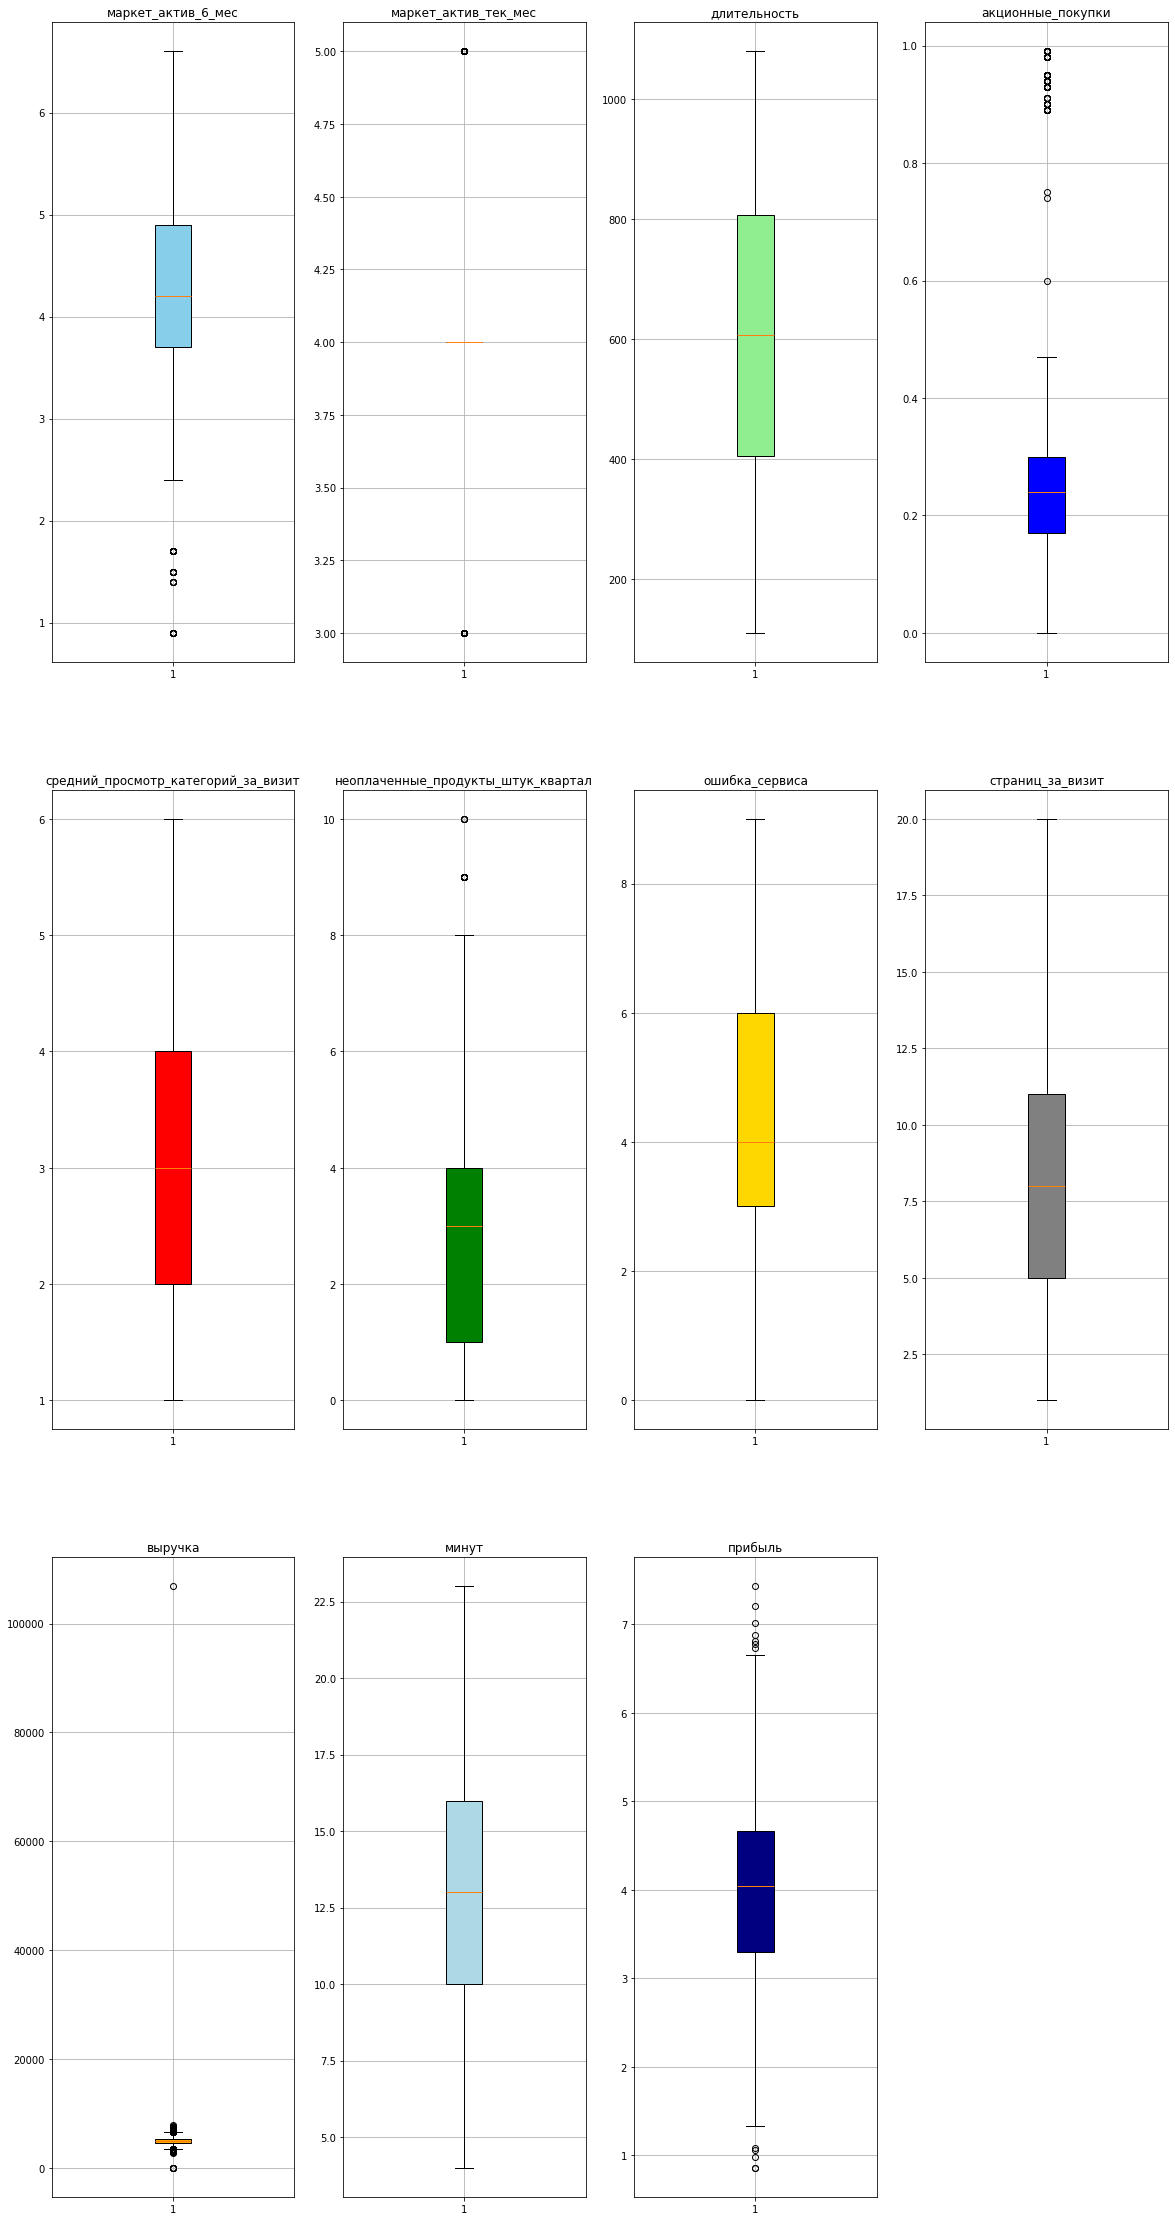

In [ ]:
gs = GridSpec(3, 4)
fig = plt.figure(figsize=(20, 40))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])
ax9 = fig.add_subplot(gs[2, 0])
ax10 = fig.add_subplot(gs[2, 1])
ax11 = fig.add_subplot(gs[2, 2])

ax1.boxplot(data_market_file['маркет_актив_6_мес'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
ax2.boxplot(data_market_file['маркет_актив_тек_мес'], patch_artist=True, boxprops=dict(facecolor='salmon'))
ax3.boxplot(data_market_file['длительность'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
ax4.boxplot(data_market_file['акционные_покупки'], patch_artist=True, boxprops=dict(facecolor='blue'))
ax5.boxplot(data_market_file['средний_просмотр_категорий_за_визит'], patch_artist=True, boxprops=dict(facecolor='red'))
ax6.boxplot(data_market_file['неоплаченные_продукты_штук_квартал'], patch_artist=True, boxprops=dict(facecolor='green'))
ax7.boxplot(data_market_file['ошибка_сервиса'], patch_artist=True, boxprops=dict(facecolor='gold'))
ax8.boxplot(data_market_file['страниц_за_визит'], patch_artist=True, boxprops=dict(facecolor='gray'))
ax9.boxplot(data_market_money['выручка'], patch_artist=True, boxprops=dict(facecolor='orange'))
ax10.boxplot(data_market_time['минут'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax11.boxplot(data_money['прибыль'], patch_artist=True, boxprops=dict(facecolor='navy'))

list_of_signs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]
list_of_signs_name = ['маркет_актив_6_мес',
                      'маркет_актив_тек_мес',
                      'длительность',
                      'акционные_покупки',
                      'средний_просмотр_категорий_за_визит',
                      'неоплаченные_продукты_штук_квартал',
                      'ошибка_сервиса',
                      'страниц_за_визит',
                      'выручка',
                      'минут',
                      'прибыль']

for i_1, i_2 in zip(list_of_signs_name, list_of_signs):
    i_2.set_title(i_1)
    i_2.grid(True)

plt.show();

*Из выеприведенных графиков видно, что **значение 106862.2 столбца 'выручка' датафрейма 'data_market_money' является выбросом** и вероятно ошибкой в данных.\
В отношении выбросов, содержащихся в столбцах 'маркет_актив_6_мес', 'акционные_покупки' и 'неоплаченные_продукты_штук_квартал' датафрейма 'data_market_file', а также в столбце 'прибыль' датафрейма 'data_money', недостаточно оснований для того, чтобы однозначно утверждать о их некорректности и необходимости удалять их из датафреймов.\
Для корректной дальнейше работой с данными заменим значение 106862.2 в столбце 'выручка' датафрейма 'data_market_money средним значением данного показателя - 5025.69.*

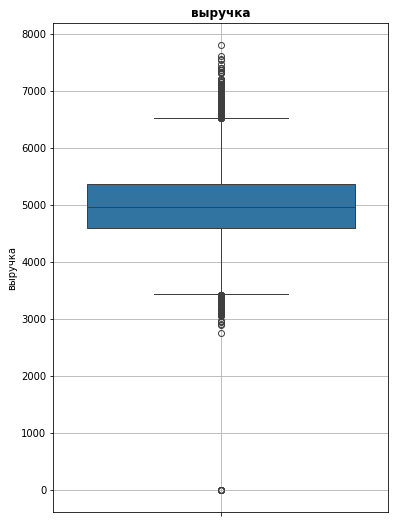

In [ ]:
data_market_money.loc[data_market_money['выручка'] == 106862.2, 'выручка'] = 5025.69

# Еще раз посмотрим график "ящик с усами" столбца 'выручка' датафрейма 'data_market_money' для самопроверки
plt.figure(figsize=(6, 9))
sns.boxplot(data=data_market_money['выручка'])
plt.title('выручка', fontweight='bold')
plt.grid(True)
plt.show();

*Значение 106862.2 в столбце 'выручка' датафрейма 'data_market_money' заменено.\
После замены аномально высокого значения становится видно, что нулевые значения также представляют собой выбросы, однако оснований удалять их из датафрейма не усматривается.*

### Построение графиков для признаков

Рассмотрим графическое представление числовых признаков датафреймов, чтобы иметь представление об их распределении.

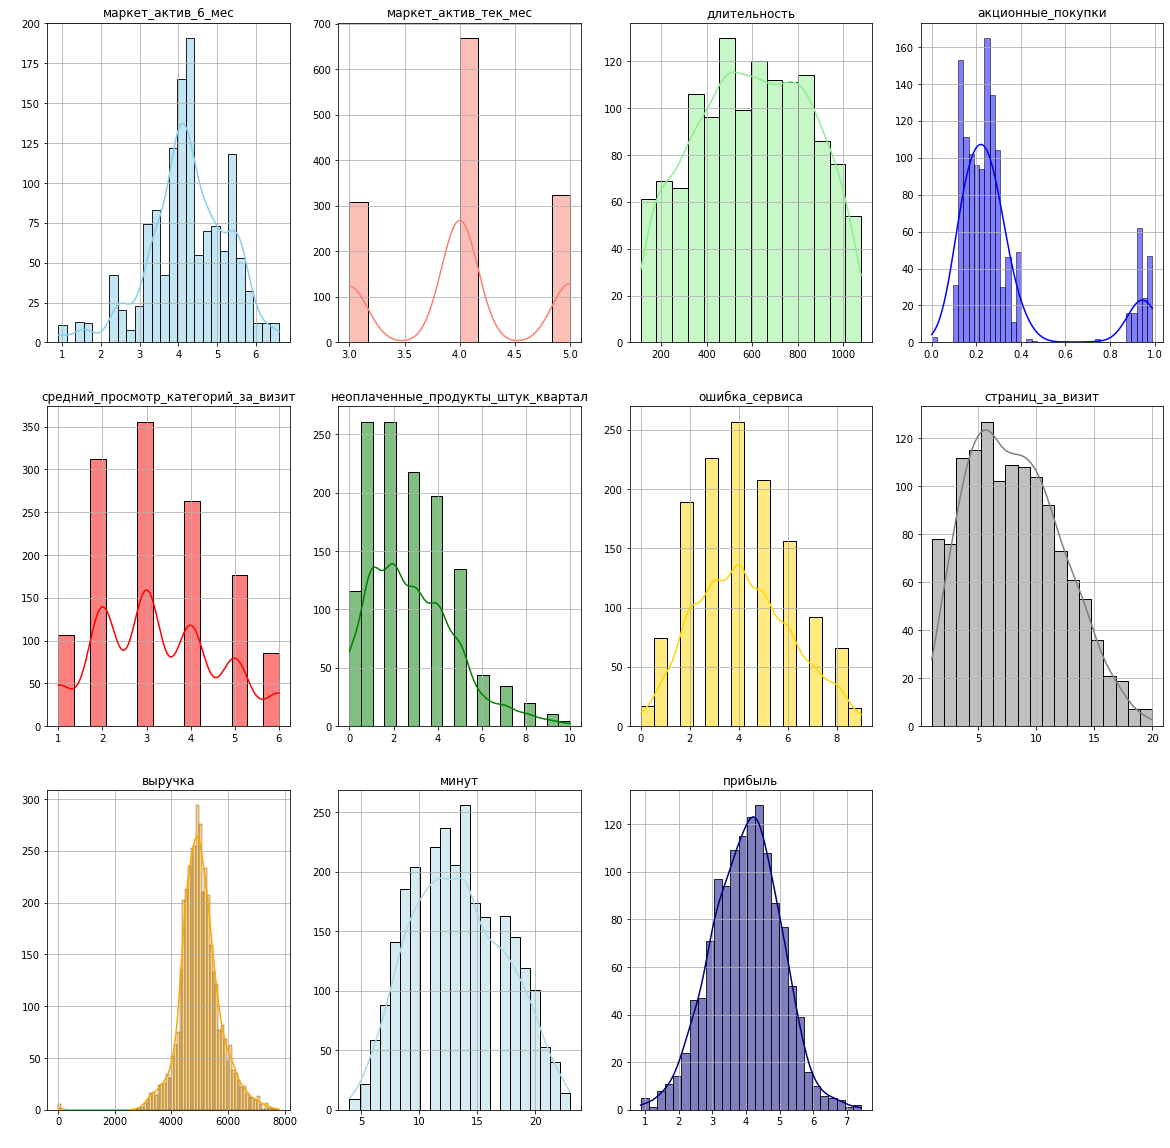

In [ ]:
gs = GridSpec(3, 4)
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2])
ax8 = fig.add_subplot(gs[1, 3])
ax9 = fig.add_subplot(gs[2, 0])
ax10 = fig.add_subplot(gs[2, 1])
ax11 = fig.add_subplot(gs[2, 2])

sns.histplot(data=data_market_file['маркет_актив_6_мес'], color='skyblue', kde=True, ax=ax1)
sns.histplot(data=data_market_file['маркет_актив_тек_мес'], color='salmon', kde=True, ax=ax2)
sns.histplot(data=data_market_file['длительность'], color='lightgreen', kde=True, ax=ax3)
sns.histplot(data=data_market_file['акционные_покупки'], color='blue', kde=True, ax=ax4)
sns.histplot(data=data_market_file['средний_просмотр_категорий_за_визит'], color='red', kde=True, ax=ax5)
sns.histplot(data=data_market_file['неоплаченные_продукты_штук_квартал'], color='green', kde=True, ax=ax6)
sns.histplot(data=data_market_file['ошибка_сервиса'], color='gold', kde=True, ax=ax7)
sns.histplot(data=data_market_file['страниц_за_визит'], color='gray', kde=True, ax=ax8)
sns.histplot(data=data_market_money['выручка'], color='orange', kde=True, ax=ax9)
sns.histplot(data=data_market_time['минут'], color='lightblue', kde=True, ax=ax10)
sns.histplot(data=data_money['прибыль'], color='navy', kde=True, ax=ax11)

list_of_signs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]

for i_1, i_2 in zip(list_of_signs_name, list_of_signs):
    i_2.set_title(i_1)
    i_2.grid(True)
    i_2.set_xlabel(' ')
    i_2.set_ylabel(' ')

plt.show();

*На основании вышепредставленных графиков можно сделать выводы, что признак 'маркет_актив_6_мес' имеет похожее на нормальное распределение с наличием всплесков и небольшим смещением вправо; признаки 'маркет_актив_тек_мес', 'средний_просмотр_категорий_за_визит', 'ошибка_сервиса', 'минут' и 'прибыль', вероятно, имеют нормальное распределение; признак 'акционные_покупки' распределен нормально и имеет самые большие всплески в значениях около 155 и 163, а также всплеск в значении около 61; признаки 'длительность', 'неоплаченные_продукты_штук_квартал' и 'страниц_за_визит' имеют распределение похожее на ненормальное - наблюдается смещение влево (для 'страниц_за_визит'); признак 'выручка' имеет распределение похожее на нормальное со смещением вправо, а также небольшим всплеском в значении 0.*

Рассмотрим графическое представление категориальных признаков датафреймов, чтобы иметь представление об их составе.

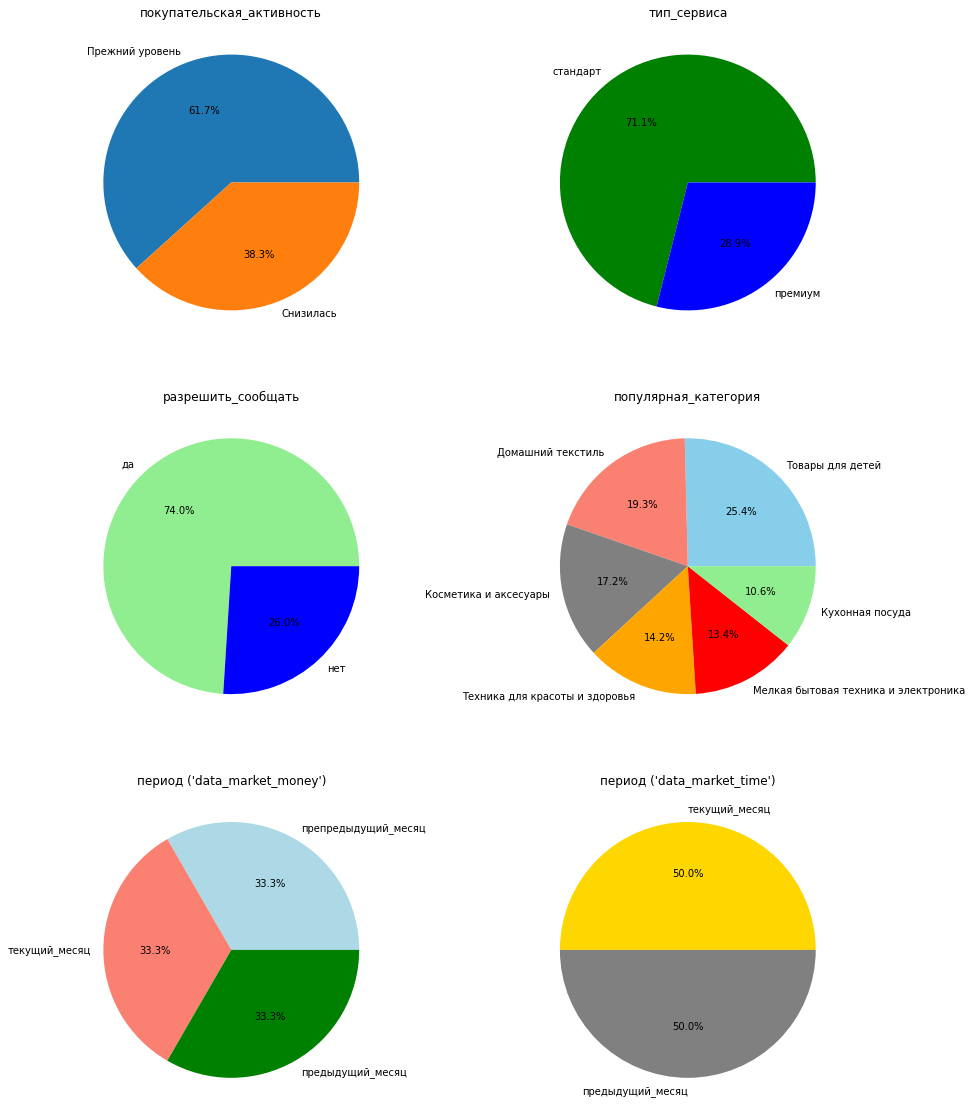

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

data_market_file['покупательская_активность'].value_counts().plot(kind='pie', ax=axs[0, 0], autopct='%1.1f%%')
data_market_file['тип_сервиса'].value_counts().plot(kind='pie', ax=axs[0, 1], autopct='%1.1f%%', colors=['green', 'blue'])
data_market_file['разрешить_сообщать'].value_counts().plot(kind='pie', ax=axs[1, 0], autopct='%1.1f%%', colors=['lightgreen', 'blue'])
data_market_file['популярная_категория'].value_counts().plot(kind='pie', ax=axs[1, 1], autopct='%1.1f%%', colors=['skyblue', 'salmon', 'gray', 'orange', 'red', 'lightgreen'])
data_market_money['период'].value_counts().plot(kind='pie', ax=axs[2, 0], autopct='%1.1f%%', colors=['lightblue', 'salmon', 'green'])
data_market_time['период'].value_counts().plot(kind='pie', ax=axs[2, 1], autopct='%1.1f%%', colors=['gold', 'gray'])

list_of_category_signs = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1], axs[2, 0], axs[2, 1]]
list_of_category_signs_name = ['покупательская_активность',
                      'тип_сервиса',
                      'разрешить_сообщать',
                      'популярная_категория',
                      "период ('data_market_money')",
                      "период ('data_market_time')"]

for i_1, i_2 in zip(list_of_category_signs_name, list_of_category_signs):
    i_2.set_title(i_1)
    i_2.set_ylabel(' ')

plt.show()

*Из представленных диаграмм видно следующее:*
- *покупательская активность снизилась у 38.3% покупателей, у остальных покупателей она осталась на прежнем уровне;*
- *тип сервиса премиум используют всего 28.9% покупателей, остальные используют тип сервиса стандарт;*
- *почти три четверти покупателей не против получать рассылки с дополнительными предложениями (74%);*
- *самой популярной категорией товаров являются товары для детей 25.4%, наименее популярной - кухонная посуда (10.6%);*
- *значения в столбцах 'период' датафреймов 'data_market_money' и 'data_market_time' распределены равными частями.*

### Отбор клиентов с покупательской активностью не менее трёх месяцев

Оставим в датафрейме 'data_market_money' только постоянных покупателей, а именно тех, которые приносили магазину выручку не менее трёх месяцев. Из прошлых этапов нам известно, что датафрейм содержит 3900 строк, при этом id каждого пользователя повторяется трижды, так как в отношении каждого пользователя указаны три периода: препредыдущий месяц, текущий месяц и предыдущий месяц. Соответсвенно в датафрейме содержится информация о 1300 покупателях. Для отсеивания покупателей, которые не были активны в каждый из трёх последних месяцев необходимо найти строки датафрейма содержащие 0 в столбце 'выручка', и удалить все соответсвующие указанным строкам id - по три одинаковых id на каждую строчку, содержащую 0 в столбце 'выручка'.

In [ ]:
data_market_money.query('выручка == 0')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


*Обнаружено три покупателя, которые приносили магазину доход только в текущем месяце: **id 215348, 215357 и 215359.**\
Удалим из датафрейма все сведения об этих покупателях (всего 9 строк).*

In [ ]:
data_market_money = data_market_money.query("id != 215348 & id != 215357 & id != 215359").reset_index(drop=True)

# Самопроверка
display(data_market_money.query('id == 215348'))
display(data_market_money.query('id == 215357'))
display(data_market_money.query('id == 215359'))
data_market_money.query('выручка == 0')

,id,период,выручка


,id,период,выручка


,id,период,выручка


,id,период,выручка


Аналогично удалим покупателей с указанными id из датафреймов 'data_market_file', 'data_market_time' и 'data_money'.

In [ ]:
data_market_file = data_market_file.query("id != 215348 & id != 215357 & id != 215359").reset_index(drop=True)
data_market_time = data_market_time.query("id != 215348 & id != 215357 & id != 215359").reset_index(drop=True)
data_money = data_money.query("id != 215348 & id != 215357 & id != 215359").reset_index(drop=True)

*Покупатели, не приносящие прибыли в каждый из трёх последних месяцев удалены из датафреймов.*

**Вывод по этапу исследовательского анализа данных:** проведен статистический анализ числовых признаков датафреймов. По результатам статистического анализа обнаружен выброс в столбце 'выручка' датафрейма 'data_market_money' - аномально высокое значение признака (106862.2) Указанный выброс заменен на среднее значение признака 'выручка' датафрейма 'data_market_money'.\
Рассмотрены графики распределения числовых признаков датафреймов, сделаны следующие выводы: признак 'маркет_актив_6_мес' имеет похожее на нормальное распределение с наличием всплесков и небольшим смещением вправо; признаки 'маркет_актив_тек_мес', 'средний_просмотр_категорий_за_визит', 'ошибка_сервиса', 'минут' и 'прибыль', вероятно, имеют нормальное распределение; признак 'акционные_покупки' распределен нормально и имеет самые большие всплески в значениях около 155 и 163, а также всплеск в значении около 61; признаки 'длительность', 'неоплаченные_продукты_штук_квартал' и 'страниц_за_визит' имеют распределение похожее на ненормальное - наблюдается смещение влево (для 'страниц_за_визит'); признак 'выручка' имеет распределение похожее на нормальное со смещением вправо, а также небольшим всплеском в значении 0.\
Рассмотрены диаграммы категориальных признаков датафреймов и установлено следующее: покупательская активность снизилась у 38.3% покупателей, у остальных покупателей она осталась на прежнем уровне; тип сервиса премиум используют всего 28.9% покупателей, остальные используют тип сервиса стандарт; почти три четверти покупателей не против получать рассылки с дополнительными предложениями (74%); самой популярной категорией товаров являются товары для детей 25.4%, наименее популярной - кухонная посуда (10.6%); значения в столбцах 'период' датафреймов 'data_market_money' и 'data_market_time' распределены равными частями.*\
Выявлены три покупателя, не являющихся постоянными (не приносящие выручки в каждый из трех последних месяцев): id 215348, 215357 и 215359. Данные об указанных покупателях удалены из датафреймов.

## Объединение таблиц

### Создание отдельных столбцов для данных о выручке и времени на сайте для каждого периода

Создадим отдельные столбцы, содержащие данные о выручке за каждый период в датафрейме 'data_market_money'.

In [ ]:
# Создадим отдельные датафреймы, содержащие данные о выручке за каждый период
data_market_money_pre_previous_month = data_market_money.query("период == 'препредыдущий_месяц'").reset_index(drop=True)
data_market_money_current_month = data_market_money.query("период == 'текущий_месяц'").reset_index(drop=True)
data_market_money_previous_month = data_market_money.query("период == 'предыдущий_месяц'").reset_index(drop=True)

# Переименование в созданных датафреймах столбцов 'выручка' на 'выручка_за_препредыдущий_месяц', 'выручка_за_текущий_месяц' и
# 'выручка_за_предыдущий_месяц' соответственно и удаление из них столбцов 'период'
data_market_money_pre_previous_month = data_market_money_pre_previous_month.drop('период', axis=1).rename(columns={'выручка':'выручка_за_препредыдущий_месяц'})
data_market_money_current_month = data_market_money_current_month.drop('период', axis=1).rename(columns={'выручка':'выручка_за_текущий_месяц'})
data_market_money_previous_month = data_market_money_previous_month.drop('период', axis=1).rename(columns={'выручка':'выручка_за_предыдущий_месяц'})

# Объединение отформатированных датафреймов, содержащих данные о выручке за каждый период в итоговый вариант датафрейма
# 'data_market_money'
data_market_money = pd.merge(data_market_money_pre_previous_month, data_market_money_previous_month, on='id')
data_market_money = pd.merge(data_market_money, data_market_money_current_month, on='id')

Создадим отдельные столбцы, содержащие данные о времени на сайте за каждый период в датафрейме 'data_market_time'.

In [ ]:
# Создадим отдельные датафреймы, содержащие данные о времени на сайте за каждый период
data_market_time_current_month = data_market_time.query("период == 'текущий_месяц'").reset_index(drop=True)
data_market_time_previous_month = data_market_time.query("период == 'предыдущий_месяц'").reset_index(drop=True)

# Переименование в созданных датафреймах столбцов 'минут' на 'минут_за_текущий_месяц' и 'минут_за_предыдущий_месяц'
# соответственно и удаление из них столбцов 'период'
data_market_time_current_month = data_market_time_current_month.drop('период', axis=1).rename(columns={'минут':'минут_за_текущий_месяц'})
data_market_time_previous_month = data_market_time_previous_month.drop('период', axis=1).rename(columns={'минут':'минут_за_предыдущий_месяц'})

# Объединение отформатированных датафреймов, содержащих данные о времени на сайте за каждый период в итоговый вариант датафрейма
# 'data_market_time'
data_market_time = pd.merge(data_market_time_previous_month, data_market_time_current_month, on='id')

Посмотрим на сведения и первые строки дополненных датафреймов 'data_market_money' и 'data_market_time'.

In [ ]:
name_of_dataframes_2 = ['<strong>data_market_money</strong>', '<strong>data_market_time</strong>']
dataframes_2 = [data_market_money, data_market_time]

for name_of_dataframe, dataframe in zip(name_of_dataframes_2, dataframes_2):
    display(HTML(name_of_dataframe))
    dataframe.info()
    display(dataframe.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1297 non-null   int64  
 1   выручка_за_препредыдущий_месяц  1297 non-null   float64
 2   выручка_за_предыдущий_месяц     1297 non-null   float64
 3   выручка_за_текущий_месяц        1297 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 50.7 KB


,id,выручка_за_препредыдущий_месяц,выручка_за_предыдущий_месяц,выручка_за_текущий_месяц
0,215349,4472.0,5216.0,4971.6
1,215350,4826.0,5457.5,5058.4
2,215351,4793.0,6158.0,6610.4
3,215352,4594.0,5807.5,5872.5
4,215353,5124.0,4738.5,5388.5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   id                         1297 non-null   int64
 1   минут_за_предыдущий_месяц  1297 non-null   int64
 2   минут_за_текущий_месяц     1297 non-null   int64
dtypes: int64(3)
memory usage: 40.5 KB


,id,минут_за_предыдущий_месяц,минут_за_текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10


*Отдельные столбцы, содержащие данные о выручке и времени на сайте для каждого периода, успешно созданы.*

Оценим наличие выбросов в созданных столбцах для дальнейшей работы с ними.

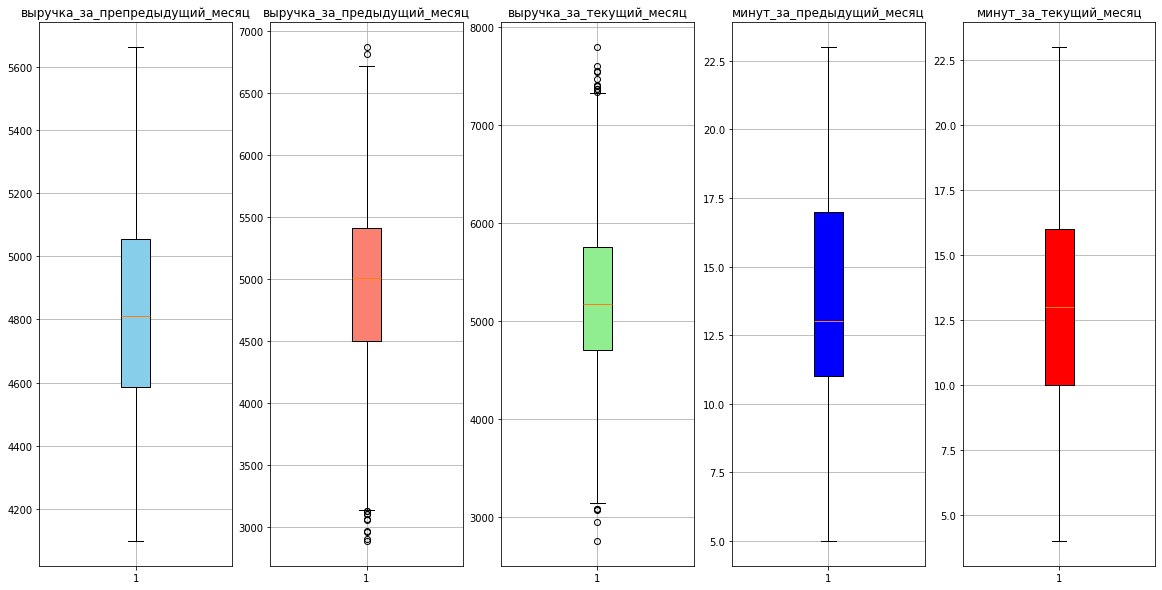

In [ ]:
gs = GridSpec(1, 5)
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[0, 4])

ax1.boxplot(data_market_money['выручка_за_препредыдущий_месяц'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
ax2.boxplot(data_market_money['выручка_за_предыдущий_месяц'], patch_artist=True, boxprops=dict(facecolor='salmon'))
ax3.boxplot(data_market_money['выручка_за_текущий_месяц'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
ax4.boxplot(data_market_time['минут_за_предыдущий_месяц'], patch_artist=True, boxprops=dict(facecolor='blue'))
ax5.boxplot(data_market_time['минут_за_текущий_месяц'], patch_artist=True, boxprops=dict(facecolor='red'))

list_of_signs_2 = [ax1, ax2, ax3, ax4, ax5]
list_of_signs_name_2 = ['выручка_за_препредыдущий_месяц',
                        'выручка_за_предыдущий_месяц',
                        'выручка_за_текущий_месяц',
                        'минут_за_предыдущий_месяц',
                        'минут_за_текущий_месяц']

for i_1, i_2 in zip(list_of_signs_name_2, list_of_signs_2):
    i_2.set_title(i_1)
    i_2.grid(True)

plt.show();

*Установлено, что выбросы присутствуют в столбцах 'выручка_за_предыдущий_месяц' и 'выручка_за_текущий_месяц' датафрейма 'data_market_money'.*

### Объединение таблиц 'market_file.csv', 'market_money.csv', 'market_time.csv'

In [ ]:
data_market_final = pd.merge(data_market_file, data_market_money, on='id')
data_market_final = pd.merge(data_market_final, data_market_time, on='id')

# Столбец, содержащий сведения об id покупателей, установим в качестве индексов датафрейма
data_market_final.set_index('id', inplace=True)

In [ ]:
# Посмотрим на объединенный датафрейм, содержащий все необходимые для моделирования данные
display(HTML('<strong>data_market_final</strong>'))
data_market_final.info()
data_market_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1297 non-null   object 
 1   тип_сервиса                          1297 non-null   object 
 2   разрешить_сообщать                   1297 non-null   object 
 3   маркет_актив_6_мес                   1297 non-null   float64
 4   маркет_актив_тек_мес                 1297 non-null   int64  
 5   длительность                         1297 non-null   int64  
 6   акционные_покупки                    1297 non-null   float64
 7   популярная_категория                 1297 non-null   object 
 8   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 10  ошибка_сервиса                       1297 non-null   int64  
 11  страниц_за_визит       

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_препредыдущий_месяц,выручка_за_предыдущий_месяц,выручка_за_текущий_месяц,минут_за_предыдущий_месяц,минут_за_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


*Объединенный датафрейм, содержащий все необходимые для моделирования данные, успешно создан.*

## Корреляционный анализ в количественной шкале

Перед изучением корреляции между количественными признаками посмотрим какое распределение имеют количественные признаки (нормальное или ненормальное).

In [ ]:
# Создадим функцию, которая переберет список количественных признаков датафрейма 'data_market_final' и определит, какое
# распределение они имеют
col_sign = [data_market_final['маркет_актив_6_мес'],
            data_market_final['маркет_актив_тек_мес'],
            data_market_final['длительность'],
            data_market_final['акционные_покупки'],
            data_market_final['средний_просмотр_категорий_за_визит'],
            data_market_final['неоплаченные_продукты_штук_квартал'],
            data_market_final['ошибка_сервиса'],
            data_market_final['страниц_за_визит'],
            data_market_final['выручка_за_препредыдущий_месяц'],
            data_market_final['выручка_за_предыдущий_месяц'],
            data_market_final['выручка_за_текущий_месяц'],
            data_market_final['минут_за_предыдущий_месяц'],
            data_market_final['минут_за_текущий_месяц']
            ]

def distribution_calculation(data):
    results = [st.chisquare(col) for col in data]
    p_values = [result[1] for result in results]
    is_normal = [p_value >= 0.05 for p_value in p_values]
    return is_normal

# Получаем список булевых значений характеристик распределения признаков и преобразуем его в датафрейм для создания таблицы с
# результатами
distribution_list = distribution_calculation(col_sign)
distribution_df = pd.DataFrame(distribution_list).rename(columns={0:'Признак'})
distribution_df['Количественный признак'] = ['маркет_актив_6_мес',
                                             'маркет_актив_тек_мес',
                                             'длительность',
                                             'акционные_покупки',
                                             'средний_просмотр_категорий_за_визит',
                                             'неоплаченные_продукты_штук_квартал',
                                             'ошибка_сервиса',
                                             'страниц_за_визит',
                                             'выручка_за_препредыдущий_месяц',
                                             'выручка_за_предыдущий_месяц',
                                             'выручка_за_текущий_месяц',
                                             'минут_за_предыдущий_месяц',
                                             'минут_за_текущий_месяц',
                                             ]

# На основании булевых значенй создаем столбец датафрейма, содержащий сведения о характеристиках распределения данных
def categorize_distribution(row):
    if row['Признак'] == False:
        return 'Данные распределены ненормально'
    else:
        return 'Данные распределены нормально'

distribution_df['Характеристика распределения данных'] = distribution_df.apply(categorize_distribution, axis=1)
distribution_df.drop(columns=['Признак']).set_index('Количественный признак')

,Характеристика распределения данных
Количественный признак,
маркет_актив_6_мес,Данные распределены нормально
маркет_актив_тек_мес,Данные распределены нормально
длительность,Данные распределены ненормально
акционные_покупки,Данные распределены нормально
средний_просмотр_категорий_за_визит,Данные распределены нормально
неоплаченные_продукты_штук_квартал,Данные распределены ненормально
ошибка_сервиса,Данные распределены нормально
страниц_за_визит,Данные распределены ненормально
выручка_за_препредыдущий_месяц,Данные распределены ненормально


С целью изучения корреляции между количественными признаками, учитывая что часть признаков распределена ненормально, построим матрицу корреляции количественных признаков датафрейма 'data_market_final' по коэффициенту Спирмена.

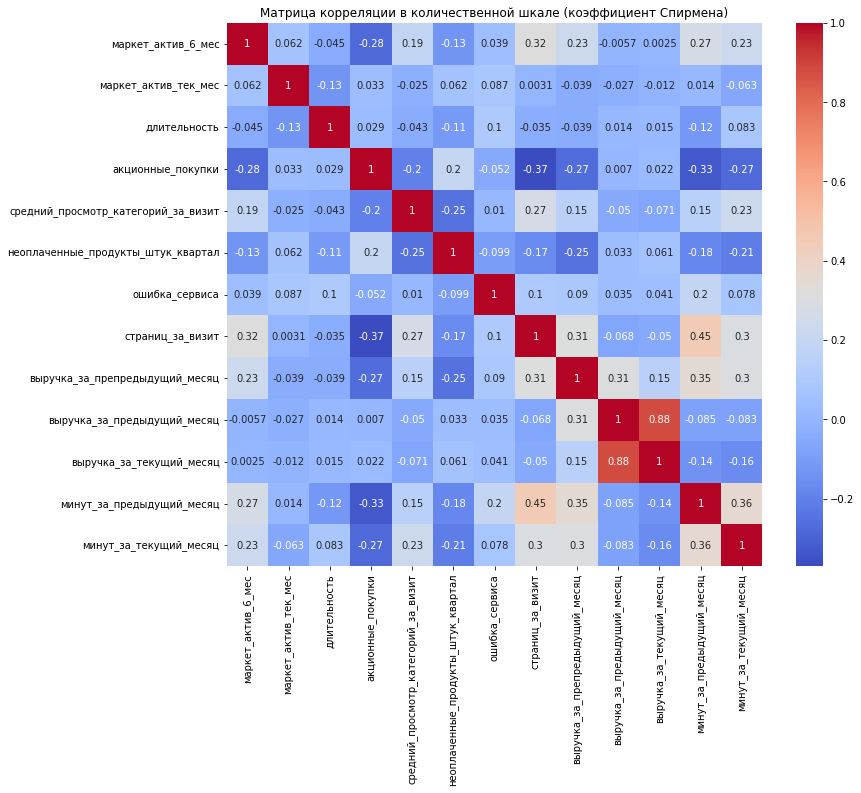

In [ ]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(data_market_final.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.xticks(rotation=90)
plt.title('Матрица корреляции в количественной шкале (коэффициент Спирмена)')
plt.show()

**Вывод по этапу корреляционного анализа в количественной шкале:** согласно коэффициенту Спирмена выявлена высокая корреляция между признаками 'выручка_за_предыдущий_месяц' и 'выручка_за_текущий_месяц' - 0.88. Она очень близка к мультиколлинеарности: как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю. Пока не станем спешить избавляться от указанных признаков.

## Создание пайплайнов

### Обработка количественных и категориальных признаков

Перед кодированием входных признаков закодируем значения столбца 'покупательская_активность' датафрейма 'data_market_final' (целевой признак) следующим образом 'Снизилась' = 1, 'Прежний уровень' = 0, с целью упрощения дальнейшей интерпретации работы модели.

In [ ]:
data_market_final['покупательская_активность'] = data_market_final['покупательская_активность'].replace(['Снизилась',
                                                                                                         'Прежний уровень'],
                                                                                                         [1, 0])
# Смотрим корректно ли закодировалось значения столбца 'покупательская_активность' датафрейма 'data_market_final'
data_market_final['покупательская_активность'].unique()

array([1, 0])

*Значение 'Снизилась' столбца 'покупательская_активность' датафрейма 'data_market_final' успешно закодировано единицой (1).*

При кодировании категориальных признаков используем **OneHotEncoder** для кодирования признаков, не имеющих никакого естетсвенного порядка: **'разрешить_сообщать', 'популярная_категория'**, и **OrdinalEncoder** для кодирования признака **'тип_сервиса'**, предположив, что значения 'премиум' и 'стандарт' имеют между собой взаимосвязь по старшенству значений.\
При кодировании количественных признаков используем **StandardScaler** в отношении признаков, не имеющих выбросов: **'длительность',	'средний_просмотр_категорий_за_визит',	'ошибка_сервиса',	'страниц_за_визит', 'выручка_за_препредыдущий_месяц',	'минут_за_предыдущий_месяц',	'минут_за_текущий_месяц',** и **RobustScaler** - для признаков, которые имеют выбросы: **'маркет_актив_6_мес',	'маркет_актив_тек_мес', 'акционные_покупки', 'неоплаченные_продукты_штук_квартал', 'выручка_за_предыдущий_месяц',	'выручка_за_текущий_месяц'**, так как RobustScaler более устойчив к выбросам.

In [ ]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    data_market_final.drop(['покупательская_активность'], axis=1),
    data_market_final['покупательская_активность'],
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify = data_market_final['покупательская_активность'])

# Посмотрим на размерность обучающей и тестовой выборок
print('Размерность обучающей выборки:', X_train.shape, 'Размерность тестовой выборки:', X_test.shape)

# Создаём списки признаков
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
ord_columns = ['тип_сервиса']
standard_num_columns = ['длительность',
                        'средний_просмотр_категорий_за_визит',
                        'ошибка_сервиса',
                        'страниц_за_визит',
                        'выручка_за_препредыдущий_месяц',
                        'минут_за_предыдущий_месяц',
                        'минут_за_текущий_месяц'
                        ]
robust_num_columns = ['маркет_актив_6_мес',
                      'маркет_актив_тек_мес',
                      'акционные_покупки',
                      'неоплаченные_продукты_штук_квартал',
                      'выручка_за_предыдущий_месяц',
                      'выручка_за_текущий_месяц'
                      ]

# создаём пайплайн для подготовки признаков из списка ohe_columns
ohe_pipe = Pipeline([('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))])

# создаём пайплайн для подготовки признаков из списка ord_columns
ord_pipe = Pipeline([('ord', OrdinalEncoder(categories=[['стандарт', 'премиум']]))])

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('standard_num', StandardScaler(), standard_num_columns),
     ('robust_num', RobustScaler(), robust_num_columns)
     ],
    remainder='passthrough'
)

Размерность обучающей выборки: (972, 16) Размерность тестовой выборки: (325, 16)


### Обучение моделей KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC()

**Целевой показатель ('покупательская_активность') является несбалансированным.** Так значение 'прежний уровень' более чем в 1.5 раза больше, чем значение 'снизилась': 61.7% против 38.3. По этой причине, полагаем, что использовать метрику accurary не оптимально, так как несбалансированность классов может повлиять на ее результаты.\
В условиях несбалансированных данных целесообразнее использовать метрики recall, precision или F1, которая учитывает одновременно и recall, и precision.\
Вместе с тем полагаем, что метрика ROC-AUC позволит получить более полное представление о производительности модели на несбалансированных данных, ввиду того, что она оценивает работу модели вне зависимости от порога вероятности и измеряет способность модели различать классы при всех возможных порогах.\
Исходя из изложенного считаем оптимальным решением использовать для оценки качества работы модели **метрику ROC-AUC.**

In [ ]:
%%time
# Создаём итоговый пайплайн
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', None)
])

param_grid = [
    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__standard_num': [StandardScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__robust_num': [StandardScaler(), RobustScaler(), 'passthrough']
    },
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__standard_num': [StandardScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__robust_num': [StandardScaler(), RobustScaler(), 'passthrough']
    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__standard_num': [StandardScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__robust_num': [StandardScaler(), RobustScaler(), 'passthrough']
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10, 100],
        'models__kernel': ['linear', 'rbf'],
        'preprocessor__standard_num': [StandardScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__robust_num': [StandardScaler(), RobustScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

CPU times: user 1min 22s, sys: 217 ms, total: 1min 22s
Wall time: 1min 23s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('ord',
                                                                                                OrdinalEncoder(categories=[['стандарт',
                                                                                                                            'премиу...
                                         'preprocessor__standard_num': [StandardScaler(),
                                                                        RobustScaler(),
                                                                        'passthrough']},
                                        {'models': [SVC(random_state=42)],
                                         'models__C': [0.1, 1, 10, 100],
                                         'models__kernel': ['linear', 'rbf'],
                                         'preprocessor__robust_num': [StandardScaler(),
                                                                      RobustScaler(),
                                                                      'passthrough'],
                                         'preprocessor__standard_num': [StandardScaler(),
                                                                        RobustScaler(),
                                                                        'passthrough']}],
                   random_state=42, scoring='roc_auc')

### Выбор лучшей модели

In [ ]:
%%time
display(HTML('<strong>Лучшая модель и её параметры:</strong>'), randomized_search.best_estimator_)
print(randomized_search.best_estimator_)
print(' ')
print('Метрика ROC-AUC лучшей модели на валидационной выборке:', randomized_search.best_score_)

# Рассчитаем прогноз на тестовых данных
y_test_pred_proba = randomized_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC лучшей модели на тестовой выборке: {roc_auc_score(y_test, y_test_pred_proba)}')
print(' ')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                                                               'премиум']]))]),
                                                  ['тип_сервиса']),
                                                 ('standa...
                                                   'выручка_за_препредыдущий_месяц',
                                                   'минут_за_предыдущий_месяц',
                                                   'минут_за_текущий_месяц']),
                                                 ('robust_num', RobustScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'акционные_покупки',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'выручка_за_предыдущий_месяц',
                                                   'выручка_за_текущий_месяц'])])),
                ('models',
                 LogisticRegression(C=1, penalty='l1', random_state=42,
                                    solver='liblinear'))])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                                                 

*Установлено, что лучшей моделью является **LogisticRegression с силой регуляризации равной 1 (C)** при методе масштабирования количественных признаков, не имеющих выбросов **StandardScaler**, и количественных признаков, имеющих выбросы - **RobustScaler**.\
Значение **метрики ROC-AUC** на тестовой выборке составило **~0.92**.*

## Анализ важности признаков для лучшей модели

Проанализируем общий вклад признаков в прогнозы модели с помощью метода 'shap.plots.bar'.

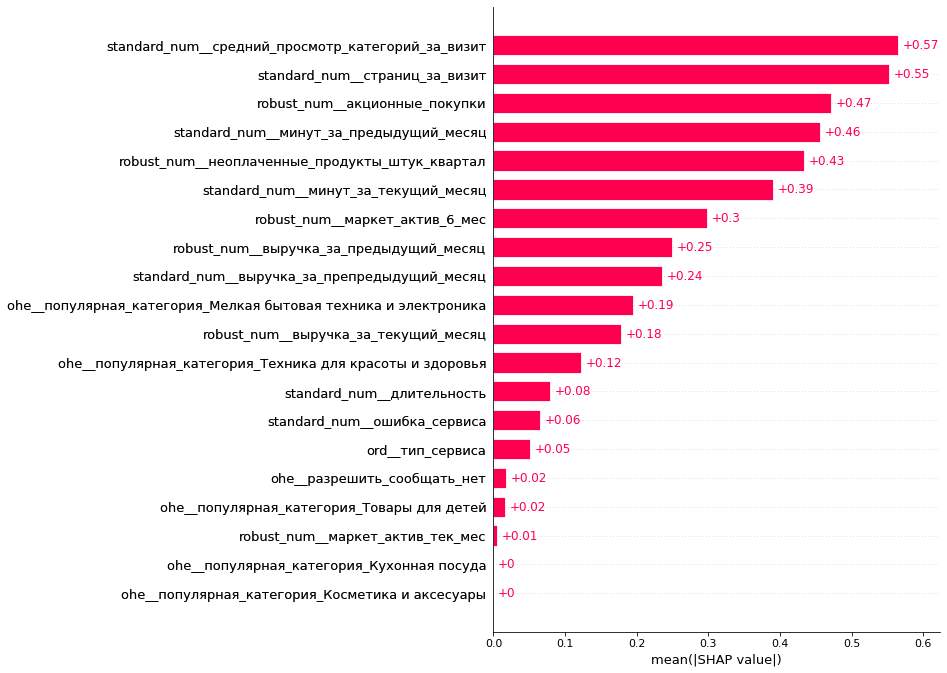

In [ ]:
# Извлечем из randomized_search лучшую модель
best_model = randomized_search.best_estimator_.named_steps['models']

# Обработаем тестовые данные с помощью методов, использованных при обучении лучшей моделей и добавим им подписи
best_preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']
X_test_processed = best_preprocessor.transform(X_test)
feature_names = best_preprocessor.get_feature_names_out()
X_test_processed_name = pd.DataFrame(X_test_processed, columns=feature_names)

# Построим график общей значимости признаков SHAP
explainer = shap.LinearExplainer(best_model, X_test_processed_name)
shap_values = explainer(X_test_processed_name)
shap.plots.bar(shap_values, max_display=20)

Визуализируем вклад признаков в каждое предсказание модели с помощью метода 'shap.plots.beeswarm'.

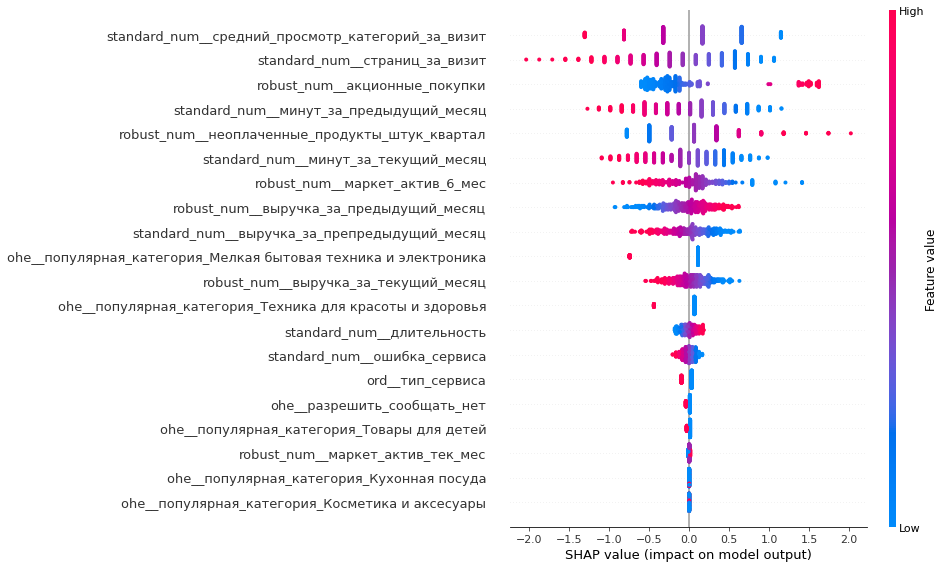

In [ ]:
shap.plots.beeswarm(shap_values, max_display=20)

**Выводы по анализу важности признаков** из представленных диаграммы видно, что сильнее всего на предсказания модели влияет признак 'средний_просмотр_категорий за визит', в лидирующую тройку также входят признаки 'страниц_за_визит' и 'акционные_покупки'. При этом признаки 'средний_просмотр_категорий за визит' и 'страниц_за_визит' имеют высокую значимость при отнесении моделью объекта к классу 0 ('Прежний уровень'), а признак 'акционные_покупки' при отнеснии к классу 1 ('Снизилась').\
В тройку самых не значительных признаков входят признаки 'разрешить_сообщать_нет', 'популярная_категория_Товары_для_детей' (указанные признаки сгенерированы моделью) и 'маркет_актив_тек_мес'.\
Признаки 'популярная_категория_Кухонная_посуда', 'популярная_категория_Косметика_и_аксесуары' (сгенерированы моделью) вовсе не оказывают никакого влияния на предсказания модели.\
Из указанного можно сделать предположение, что для сохранения покупательской способности постоянных покупателей на прежнем цровне целесообразно поработать над сайтом магазина (переосмыслить навигацию по сайту, возможно, минимизировать количество "кликов", которые покупатель должен сделать для того, чтобы найти необходимое категорию, а после выбора товра - попасть в корзину и на страницу оплаты товара). Также следует чаще проводить акционные распродажи, так как указанное способствует сохранению покупательской способности на прежнем уровне.

## Сегментация покупателей

### Сегментация покупателей на основе результатов моделирования и данных о прибыльности покупателей

Создадим единый датафрейм, содеражщий данные о прибыльности покупателей, а также вероятности снижения их покупательской активности в следующие три месяца, полученные на тестовой выборке.

In [ ]:
# Получаем предсказания покупательской способности на тестовой выборке
# y_pred = best_model.predict(X_test_processed)

# Переменная y_test_pred_proba содержит вероятности отнесения объектов к классу 1 (покупательская активность снизилась)
# Создадим датафрейм 'data_market_pred', содержащий сведения из тестовой выборки и предсказания вероятности снижения
# покупательской активности
data_market_pred = X_test.assign(вероятность_снижения_покупательской_активности = y_test_pred_proba)

# Добавляем в датафрейм 'data_market_pred' сведения о прибыльности покупателей из 'data_money'
data_market_pred = data_market_pred.reset_index().rename(columns={'index': 'id'})
data_market_pred.sort_values('id', ascending=True, inplace=True)
data_market_pred.reset_index(drop=True, inplace=True)
data_market_pred = pd.merge(data_market_pred, data_money, on='id', how='left')

# Смотрим сведения о получившемся датафрейме и его первые строки
display(HTML('<strong>data_market_pred</strong>'))
data_market_pred.info()
data_market_pred.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 324
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              325 non-null    int64  
 1   тип_сервиса                                     325 non-null    object 
 2   разрешить_сообщать                              325 non-null    object 
 3   маркет_актив_6_мес                              325 non-null    float64
 4   маркет_актив_тек_мес                            325 non-null    int64  
 5   длительность                                    325 non-null    int64  
 6   акционные_покупки                               325 non-null    float64
 7   популярная_категория                            325 non-null    object 
 8   средний_просмотр_категорий_за_визит             325 non-null    int64  
 9   неоплаченные_продукты_штук_квартал         

,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_препредыдущий_месяц,выручка_за_предыдущий_месяц,выручка_за_текущий_месяц,минут_за_предыдущий_месяц,минут_за_текущий_месяц,вероятность_снижения_покупательской_активности,прибыль
0,215349,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10,0.902795,4.16
1,215351,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13,0.802446,4.87
2,215353,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10,0.582861,3.95
3,215354,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,4503.0,5685.0,5869.6,11,12,0.815283,3.62
4,215355,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,4749.0,3263.0,3772.6,12,10,0.164274,5.26
5,215356,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4433.0,4146.5,4566.4,6,7,0.911650,4.93
6,215362,премиум,да,4.2,4,438,0.74,Домашний текстиль,3,4,6,4,4765.0,4314.0,4447.9,13,13,0.841859,3.49
7,215363,стандарт,нет,4.9,4,923,0.29,Товары для детей,6,0,3,1,4633.0,6010.0,6128.3,8,5,0.623899,1.83
8,215364,премиум,да,4.3,4,708,0.98,Домашний текстиль,3,3,3,3,4942.0,5795.5,5484.8,11,9,0.964404,2.67
9,215365,стандарт,да,3.9,4,167,0.95,Техника для красоты и здоровья,6,4,2,5,4190.0,4577.0,4799.3,6,10,0.903658,3.65


Перед выделением сегментов покупателей для анализа и подготовки рекоммендаций рассмотрим сведения о прибыльности покупателей, а также объеме совершаемых ими акционных покупок.

,Средняя доля акционных покупок,Максимальная доля акционных покупок,Средняя прибыль,Максимальная прибыль
0,0.325785,0.99,3.955785,7.43


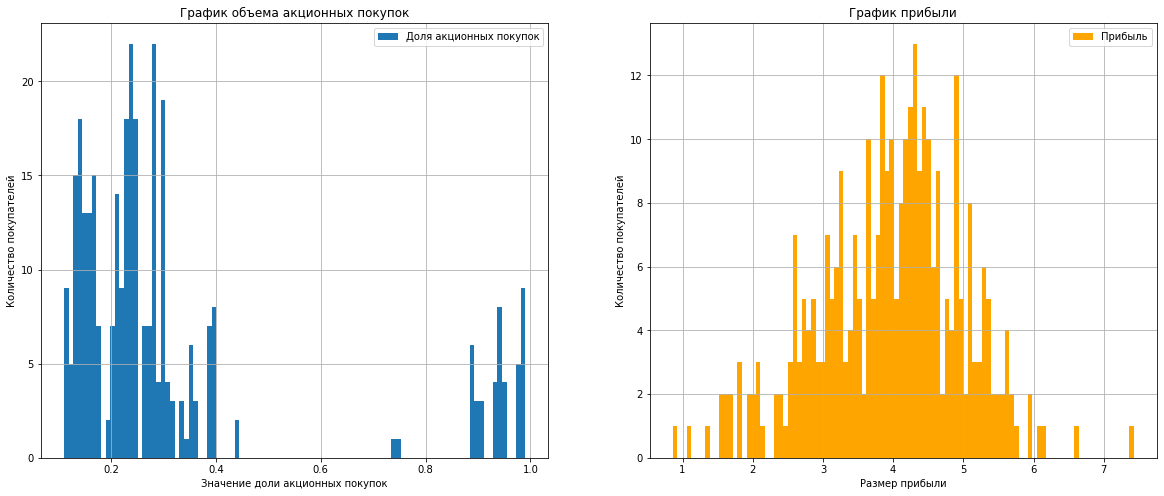

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
axes[0].hist(x=data_market_pred['акционные_покупки'], label='Доля акционных покупок', bins=100)
axes[1].hist(x=data_market_pred['прибыль'], label='Прибыль', bins=100, color='orange')
axes[0].set_xlabel('Значение доли акционных покупок')
axes[0].set_ylabel('Количество покупателей')
axes[0].set_title('График объема акционных покупок')
axes[0].grid(True)
axes[0].legend()
axes[1].set_xlabel('Размер прибыли')
axes[1].set_ylabel('Количество покупателей')
axes[1].set_title('График прибыли')
axes[1].grid(True)
axes[1].legend();

data_market_pred_table = pd.DataFrame({'Средняя доля акционных покупок': [data_market_pred['акционные_покупки'].mean()],
                          'Максимальная доля акционных покупок': [data_market_pred['акционные_покупки'].max()],
                          'Средняя прибыль': [data_market_pred['прибыль'].mean()],
                          'Максимальная прибыль': [data_market_pred['прибыль'].max()]


                          })
data_market_pred_table

*Из представленных графиков  видно, что в наших данных присутсвует значительное количество покупателей, у которых доля акционных покупок составляет от ~10% до 40%, а также сравнителлььно  небольшая группа покупателей, у которых для акционных покупок составляет от ~90% до 99%, при этом средняя доля акционных покупок по всем покупателям составляет ~32%.\
Относительно прибыли поллагаем есть основания утверждать, что она распределена нормально. Средняя прибыль равна ~3.95, а максимальная 7.43, при этом видно, что покупателей, которые бы приносили заказчику прибыли больше 6 совсем мало (3).\
Имея представления о распределении доли акционных покупок и прибыли для дальнейшего анализа **выделим сегмент прибыльных покупателей, чья покупательская способность согласно предсказаниям модели в следующие три месяца с высокой вероятностью снизится**, и сегмент прибыльных **покупателей, чья покупательская способность согласно предсказаниям модели в следующие три месяца останется на прежнем уровне** и сравним их в том числе на предмет объема акционных покупок. К высокой прибыли отнесем прибыль, достигающую порога 4 включительно (чуть выше средней прибыли), для высокой вероятности снижения покупательской способности возьмем вероятность снижения более 75%, для вероятность того, что покупательская активность останется на прежнем уровне возьмем вероятность снижения прибыли менее 25%.*

In [ ]:
data_market_profit_down = data_market_pred.query('прибыль >= 4.0 & вероятность_снижения_покупательской_активности > 0.75')
data_market_profit_remain = data_market_pred.query('прибыль >= 4.0 & вероятность_снижения_покупательской_активности < 0.25')

segments_data = pd.DataFrame({'Сегменты': ['Прибыльные покупатели, чья покупательская активность снизится',
                                           'Прибыльные покупатели, чья покупательская активность останется на прежнем уровне'],
                              'Количество покупателей': [len(data_market_profit_down), len(data_market_profit_remain)]
                              }).set_index('Сегменты')

segments_data

,Количество покупателей
Сегменты,
"Прибыльные покупатели, чья покупательская активность снизится",50
"Прибыльные покупатели, чья покупательская активность останется на прежнем уровне",89


### Графическое и аналитическое исследование отдельной группы покупателей

Сравним сегмент прибыльных покупателей, чья покупательская способность согласно предсказаниям модели в следующие три месяца с высокой вероятностью снизится, с прибыльные покупатели, чья покупательская активность вероятно останется на прежнем уровне, в частности рассмотрим объем акционных покупок в разрезе указанных сегментов.\
С указанной целью построим гистограммы для всех количественных признаков в разбивке по сегментам.

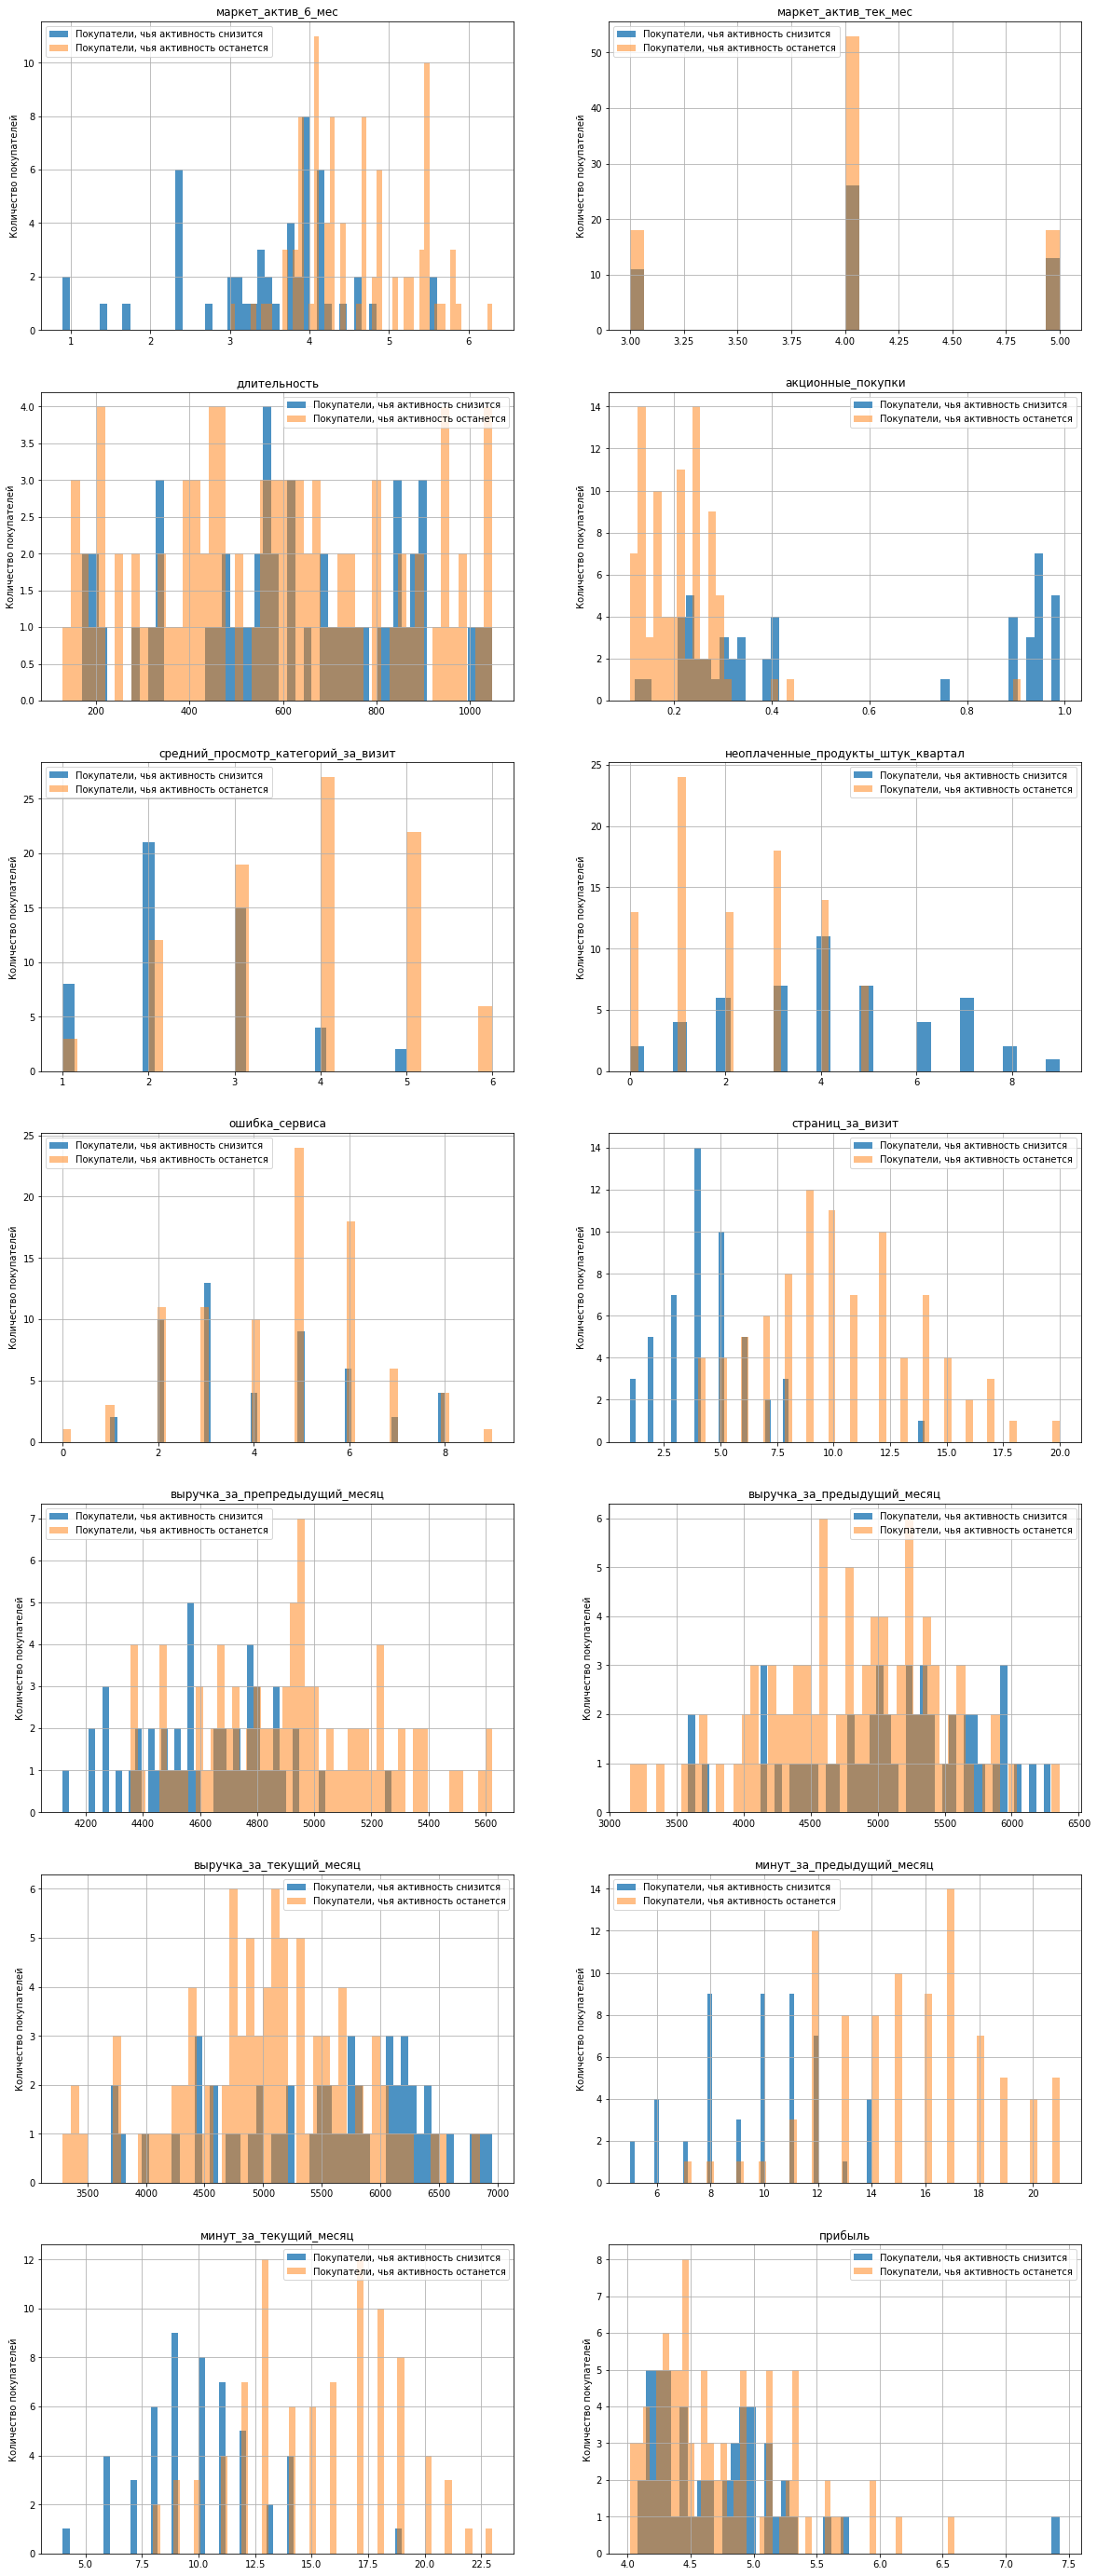

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 50))
axes[0, 0].hist(x=data_market_profit_down['маркет_актив_6_мес'], alpha=0.8, label='Покупатели, чья активность снизится', bins=50)
axes[0, 0].hist(x=data_market_profit_remain['маркет_актив_6_мес'], alpha=0.5, label='Покупатели, чья активность останется', bins=50)
axes[0, 1].hist(x=data_market_profit_down['маркет_актив_тек_мес'], alpha=0.8, label='Покупатели, чья активность снизится', bins=30)
axes[0, 1].hist(x=data_market_profit_remain['маркет_актив_тек_мес'], alpha=0.5, label='Покупатели, чья активность останется', bins=30)
axes[1, 0].hist(x=data_market_profit_down['длительность'], alpha=0.8, label='Покупатели, чья активность снизится', bins=50)
axes[1, 0].hist(x=data_market_profit_remain['длительность'], alpha=0.5, label='Покупатели, чья активность останется', bins=50)
axes[1, 1].hist(x=data_market_profit_down['акционные_покупки'], alpha=0.8, label='Покупатели, чья активность снизится', bins=50)
axes[1, 1].hist(x=data_market_profit_remain['акционные_покупки'], alpha=0.5, label='Покупатели, чья активность останется', bins=50)
axes[2, 0].hist(x=data_market_profit_down['средний_просмотр_категорий_за_визит'], alpha=0.8, label='Покупатели, чья активность снизится', bins=30)
axes[2, 0].hist(x=data_market_profit_remain['средний_просмотр_категорий_за_визит'], alpha=0.5, label='Покупатели, чья активность останется', bins=30)
axes[2, 1].hist(x=data_market_profit_down['неоплаченные_продукты_штук_квартал'], alpha=0.8, label='Покупатели, чья активность снизится', bins=30)
axes[2, 1].hist(x=data_market_profit_remain['неоплаченные_продукты_штук_квартал'], alpha=0.5, label='Покупатели, чья активность останется', bins=30)
axes[3, 0].hist(x=data_market_profit_down['ошибка_сервиса'], alpha=0.8, label='Покупатели, чья активность снизится', bins=50)
axes[3, 0].hist(x=data_market_profit_remain['ошибка_сервиса'], alpha=0.5, label='Покупатели, чья активность останется', bins=50)
axes[3, 1].hist(x=data_market_profit_down['страниц_за_визит'], alpha=0.8, label='Покупатели, чья активность снизится', bins=50)
axes[3, 1].hist(x=data_market_profit_remain['страниц_за_визит'], alpha=0.5, label='Покупатели, чья активность останется', bins=50)
axes[4, 0].hist(x=data_market_profit_down['выручка_за_препредыдущий_месяц'], alpha=0.8, label='Покупатели, чья активность снизится', bins=50)
axes[4, 0].hist(x=data_market_profit_remain['выручка_за_препредыдущий_месяц'], alpha=0.5, label='Покупатели, чья активность останется', bins=50)
axes[4, 1].hist(x=data_market_profit_down['выручка_за_предыдущий_месяц'], alpha=0.8, label='Покупатели, чья активность снизится', bins=50)
axes[4, 1].hist(x=data_market_profit_remain['выручка_за_предыдущий_месяц'], alpha=0.5, label='Покупатели, чья активность останется', bins=50)
axes[5, 0].hist(x=data_market_profit_down['выручка_за_текущий_месяц'], alpha=0.8, label='Покупатели, чья активность снизится', bins=50)
axes[5, 0].hist(x=data_market_profit_remain['выручка_за_текущий_месяц'], alpha=0.5, label='Покупатели, чья активность останется', bins=50)
axes[5, 1].hist(x=data_market_profit_down['минут_за_предыдущий_месяц'], alpha=0.8, label='Покупатели, чья активность снизится', bins=50)
axes[5, 1].hist(x=data_market_profit_remain['минут_за_предыдущий_месяц'], alpha=0.5, label='Покупатели, чья активность останется', bins=50)
axes[6, 0].hist(x=data_market_profit_down['минут_за_текущий_месяц'], alpha=0.8, label='Покупатели, чья активность снизится', bins=50)
axes[6, 0].hist(x=data_market_profit_remain['минут_за_текущий_месяц'], alpha=0.5, label='Покупатели, чья активность останется', bins=50)
axes[6, 1].hist(x=data_market_profit_down['прибыль'], alpha=0.8, label='Покупатели, чья активность снизится', bins=50)
axes[6, 1].hist(x=data_market_profit_remain['прибыль'], alpha=0.5, label='Покупатели, чья активность останется', bins=50);


list_of_num_rich = [axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1], axes[2, 0], axes[2, 1], axes[3, 0],
                    axes[3, 1], axes[4, 0], axes[4, 1], axes[5, 0], axes[5, 1], axes[6, 0], axes[6, 1],]
list_of_num_rich_name = ['маркет_актив_6_мес',
                         'маркет_актив_тек_мес',
                         'длительность',
                         'акционные_покупки',
                         'средний_просмотр_категорий_за_визит',
                         'неоплаченные_продукты_штук_квартал',
                         'ошибка_сервиса',
                         'страниц_за_визит',
                         'выручка_за_препредыдущий_месяц',
                         'выручка_за_предыдущий_месяц',
                         'выручка_за_текущий_месяц',
                         'минут_за_предыдущий_месяц',
                         'минут_за_текущий_месяц',
                         'прибыль'
                         ]

for i_1, i_2 in zip(list_of_num_rich_name, list_of_num_rich):
    i_2.set_title(i_1)
    i_2.set_ylabel('Количество покупателей')
    i_2.grid(True)
    i_2.legend()

plt.show();

*Из представленных гистограмм усматриваются следующие имеющие значение для выработки рекомендаций заказчику различия в поведении (работе с) прибыльных(ми) покупателей(ями), чья покупательская активность согласно предсказаниям модели в следующие три месяца с высокой вероятностью снизится, и прибыльных(ми) покупателей(ями), чья покупательская активность согласно предсказаниям модели в следующие три месяца с высокой вероятностью останется на прежнем уровне:*
- *касательно признака 'маркет_актив_6_мес' - в отношении покупателей, чья активность снизится, среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев, лишь в единичных случаях превышает значение 4, тогда тогда как покуптели, чья активность останется, рассылок, звонков, показов рекламы и прочего получали больше (от 4 до ~6);*
- *касательно признака 'акционные_покупки' - в отношении покупателей, чья активность снизится, наблюдается их приверженность к высокому спросу на акционные предлложения: для примерно половины таких покупателей доля акционны покупок составляет от 20% до 40%, а для другой половины от 90% до 99%. При этом покупатели, чья активность останется, совершают по акциям от ~10% до 30% от общего объема покупок;*
- *касательно признака 'средний_просмотр_категорий_за_визит' - для покупателей, чья активность снизится, самыми высокими показателями данного признака являются 2, 3 категории за визит, тогда как покуптели, чья активность останется, чаще просматривают от 3 до 5 категорий за визит;*
- *касательно признака 'неоплаченные_продукты_штук_квартал' - у покуптелей, чья активность останется, максимальное количество неоплаченных товаров 5 шт., а самое частое количество неоплаченных товаров - 1 шт. а вот у покупателей, чья активность снизится, данный признак достигает 9 шт., а самое распространенное количество неоплаченных товаров - 4 шт;*
- *касательно признака 'страниц_за_визит' - для покупателей, чья активность снизится, самыми высокими показателями данного признака являются ~7.5 страниц за визит, а самым распространенным значением ~4 страницы за визит, тогда как покуптели, чья активность останется, просматривают даже 20 страниц за визит, а чаще всего 9, 10 или 12 страниц за визит;*
- *касательно признаов 'минут_за_предыдущий_месяц' и 'минут_за_текущий_месяц' - для покупателей, чья активность снизится, самыми высокими показателями данного признака являются 14 минут, а самым распространенным значением ~8-10 минут, при этом покуптели, чья активность останется, тратят до 20-22.5 минут, а чаще всего проводят на сайте ~12 или ~17 минут.*

Рассмотрим категориальные признаки в разбивке по сегментам, для этого построим столбчатые диаграммы.

/tmp/ipykernel_48/2791825605.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=10)


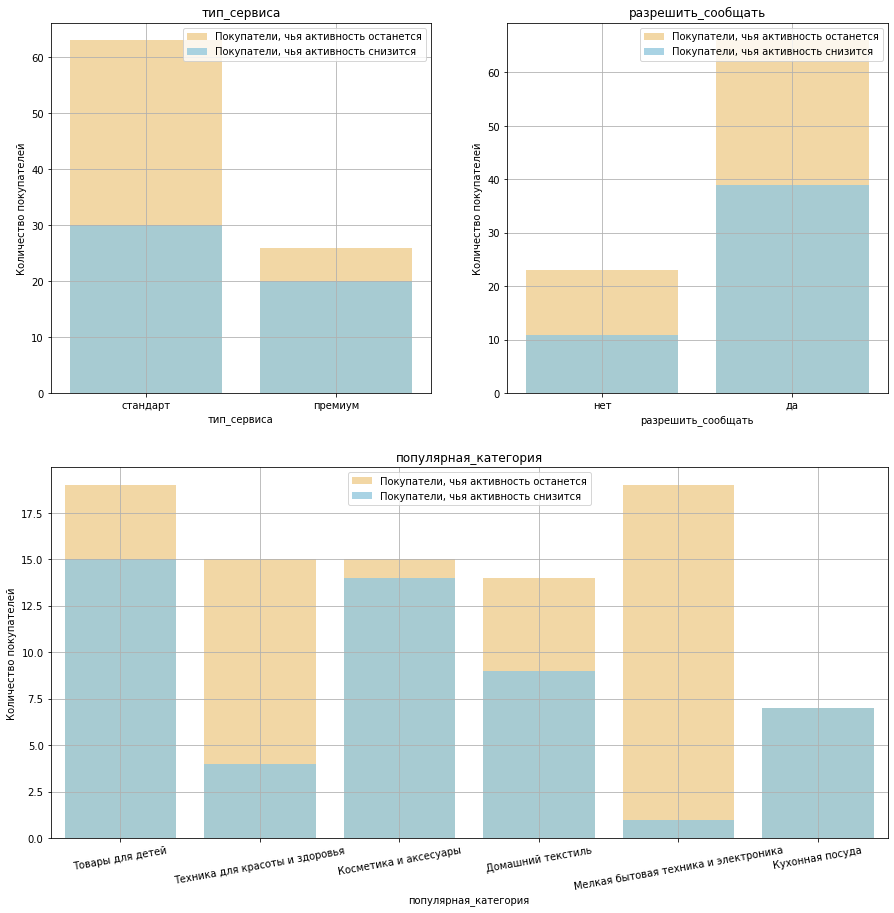

In [ ]:
gs = GridSpec(2, 2)
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1:, :])

sns.countplot(x=data_market_profit_remain['тип_сервиса'], color='orange', alpha=0.4, ax=ax1, label='Покупатели, чья активность останется')
sns.countplot(x=data_market_profit_down['тип_сервиса'], color='skyblue', alpha=0.8, ax=ax1, label='Покупатели, чья активность снизится')
sns.countplot(x=data_market_profit_remain['разрешить_сообщать'], color='orange', alpha=0.4, ax=ax2, label='Покупатели, чья активность останется')
sns.countplot(x=data_market_profit_down['разрешить_сообщать'], color='skyblue', alpha=0.8, ax=ax2, label='Покупатели, чья активность снизится')
sns.countplot(x=data_market_profit_remain['популярная_категория'], color='orange', alpha=0.4, ax=ax3, label='Покупатели, чья активность останется')
sns.countplot(x=data_market_profit_down['популярная_категория'], color='skyblue', alpha=0.8, ax=ax3, label='Покупатели, чья активность снизится')

ax3.set_xticklabels(ax3.get_xticklabels(), rotation=10)

list_of_num_rich_2 = [ax1, ax2, ax3]
list_of_num_rich_name_2 = ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']

for i_1, i_2 in zip(list_of_num_rich_name_2, list_of_num_rich_2):
    i_2.set_title(i_1)
    i_2.set_ylabel('Количество покупателей')
    i_2.grid(True)

plt.show();

*Из представленных диаграмм усматривается, что портреты прибыльных покупателей, чья покупательская активность согласно предсказаниям модели в следующие три месяца с высокой вероятностью снизится, и прибыльных покупателей, чья покупательская активность согласно предсказаниям модели в следующие три месяца с высокой вероятностью останется на прежнем уровне, в целом схожи. Крупные отличия имеются только в  отношении двух категорий товаров: техника для красоты и здоровья и мелкая бытовая техника и электроника, так покупатели, чья активность снизится, преобретают товаров из указанных категорий в разы меньше.*

**Вывод по этапу исследования отдельного сегмента покупателей:** для исследования и подготовки предложений заказчику был выбран сегмент прибыльных покупателей, чья покупательская активность согласно предсказаниям модели в следующие три месяца с высокой вероятностью снизится. Указанное обусловлено тем, что потеря таких покупателей или снижение их покупательской активности может иметь самый критический негативный эффект для заказчика, так как он упустит большие прибыли, в связи с чем покупательскую активность данных клиентов важно сохранить на прежнем уровне или увеличить.\
Для исследования прибыльных покупателей, чья активность снизится, был проведен сравнительный анализ указанных покупателей и прибыльных покупателей, чья покупательская активность согласно предсказаниям модели в следующие три месяца с высокой вероятностью останется на прежнем уровне.\По рузкльтатам анализа выявлены следующие важные отличия в поведении данных групп покупателей, а также работе с ними:
- в отношении покупателей, чья активность снизится, среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев, лишь в единичных случаях превышает значение 4, тогда тогда как покуптели, чья активность останется, рассылок, звонков, показов рекламы и прочего получали больше (от 4 до ~6);
- в отношении покупателей, чья активность снизится, выявлена их приверженность к высокому спросу на акционные предлложения: для примерно половины таких покупателей доля акционны покупок составляет от 20% до 40%, а для другой половины от 90% до 99%. При этом покупатели, чья активность останется, совершают по акциям от ~10% до 30% покупок от общего объема покупок;
- для покупателей, чья активность снизится, самым быльшим количеством просматриваемых категорий за визит является 2, 3 категории, тогда как покуптели, чья активность останется, чаще просматривают от 3 до 5 категорий за визит;
- у покуптелей, чья активность останется, максимальное количество неоплаченных товаров 5 шт., а самое частое количество неоплаченных товаров - 1 шт. тогда как у покупателей, чья активность снизится, количество таких товаров достигает 9 шт., а самое распространенное количество неоплаченных товаров - 4 шт;
- для покупателей, чья активность снизится, самым высоким количеством просмотренных за визит страниц являются ~7.5 страниц, а самым распространенным количеством ~4 страницы, при этом покуптели, чья активность останется, просматривают вплоть до 20 страниц за визит, а чаще всего 9, 10 или 12 страниц;
- для покупателей, чья активность снизится, самым большим количеством минут, проведенных на сайте, является 14 минут, а самая распространенная длительность времени, проведенного на сайте - ~8-10 минут, тогда как покуптели, чья активность останется, проводят на сайте до 20-22.5 минут, а чаще всего - ~12 или ~17 минут.\
Исходя из изложенного поллагаем возможным предположить, что прибыльные покупатели, чья покупательская активность должна снизиться преимущественно являются покупателями, которые готовы совершить дорогостоящие покупки, когда проводятся акции на интрересующий их товар. Вероятно данные покупатели не являются постоянными покупателями, а пользуются интернет-магазином заказчика только для приобретения нужного им товара по акции, после того как им стало известно о том, что магазином проводится акции. Днный вывод следует из того, что данные покупатели не проводят на сайте много времени, они не просматривают большого количества страниц или категорий, они полььзуются сайтом целенаправленно для того, чтобы оформить заказ. При эторм установлено, что такие покупатели сравнительно редко получают извещения о маркетинговых акциях, а также склонны оставлять товар неопллаченным в корзине.

**В соответствии с изложенным полагаем целесообразным рекомендовать заказчику для сохранения покупательской активности указанных покупатлей на прежнем уровне увеличить для них количество персонализированных акционных предложений с учетом имеющихся у заказчика сведений о популярной категории товаров у каждого отдельного покупателя, одновременно с увеличив количество рассылаемых им уведомлений о начале акции. Также предлагаем рассмотреть вопрос о создании сервиса, который бы в корректной форме напоминал покупателю о том, что он не закончил покупки и у него в корзине находится товар, с обеспечением возможности при поллучении такого напоминания в минимальное количество "кликов мыши" вернуться в корзину и закончить оформление заказа.**

## Общий вывод

**Описание задачи, на решение которой было направлено исследование**
    
Разработать для интернет-магазина «В один клик» решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность, в том числе:
- *построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца;*
- *включить в исследование дополнительные данные о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца;*
- *используя данные модели и данные о прибыльности клиентов выделить сегменты покупателей и разработать для них персонализированные предложения.*

**Описание исходных данных**
    
***Описание данных датасета 'market_file.csv'*** (содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении):
    
***id*** — номер покупателя в корпоративной базе данных.\
***Покупательская активность*** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».\
***Тип сервиса*** — уровень сервиса.\
***Разрешить сообщать*** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре.\
***Маркет_актив_6_мес*** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев.\
***Маркет_актив_тек_мес*** — количество маркетинговых коммуникаций в текущем месяце.\
***Длительность*** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.\
***Акционные_покупки*** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.\
***Популярная_категория*** — самая популярная категория товаров у покупателя за последние 6 месяцев.\
***Средний_просмотр_категорий_за_визит*** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.\
***Неоплаченные_продукты_штук_квартал*** — общее число неоплаченных товаров в корзине за последние 3 месяца.\
***Ошибка_сервиса*** — число сбоев, которые коснулись покупателя во время посещения сайта.\
***Страниц_за_визит*** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
    
***Описание данных датасета 'market_money.csv'*** (содержит данные о выручке, которую получает магазин с покупателя):

***id*** — номер покупателя в корпоративной базе данных.\
***Период*** — название периода, во время которого зафиксирована выручка.\
***Выручка*** — сумма выручки за период.

***Описание данных датасета 'market_time.csv'*** (содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода):
    
***id*** — номер покупателя в корпоративной базе данных.\
***Период*** — название периода, во время которого зафиксировано общее время.\
***минут*** — значение времени, проведённого на сайте, в минутах.

***Описание данных датасета 'money.csv'*** (содержит данные о среднемесячной прибыли покупателя за последние 3 месяца):
    
***id*** — номер покупателя в корпоративной базе данных.\
***Прибыль*** — значение прибыли.

**Сведения о проведенной предобработке данных**

- названия отдельных столбцов датафреймов не соответствовали стилю написания snake_case: были записаны с прописных букв, а также столбцы имели в названиях пробелы - недочет устранен (названия столбцов приведены к формату 'snake_case');
- выполнен поиск пропусков в данных и строк-дубликатов - наличие пропусков в данных и строк-дубликатов не выявлено ни в одном датафрейме;
- в столбце 'тип_сервиса' датафрейма 'data_market_file' выявлены неявные дубликаты ('стандартт' и 'стандарт') - недочет устранен ('стандартт' переименован в 'стандарт');
- в столбце 'период' датафрейма 'data_market_time' выявлено некорректное значение ('предыдцщий_месяц' вместо 'предыдущий_месяц') - недочет устранен (предыдцщий_месяц' переименован в 'предыдущий_месяц').

**Поиск лучшей прогнозной модели**

Установлено, что целевой показатель ('покупательская_активность') является несбалансированным: значение 'прежний уровень' более чем в 1.5 раза больше, чем значение 'снизилась': 61.7% против 38.3. По этой причине для поиска лучшей модели было принято решение использовать **метрику ROC-AUC**, так как при несбалансированности целевого показателя использовать метрики recall и precision может быть не оптимально, ввиду того, что несбалансированность может повлиять на их интерпретацию. Метрика ROC-AUC же позволяет получить более полное представление о производительности модели на несбалансированных данных, ввиду того, что она оценивает работу модели вне зависимости от порога вероятности и измеряет способность модели различать классы при всех возможных порогах.\
Для создания лучшей модели был использован пайплайн, перебирающий следующие модели и гиперпараметры: **KNeighborsClassifier** (гиперпараметр: количество ближайших соседей, которые будут учитываться при прогнозировании класса), **DecisionTreeClassifier** (гиперпараметры: максимальная глубина дерева решений и максимальное количество признаков, которые рассматриваются при поиске лучшего разделения в узле), **LogisticRegression** (гиперпараметр: сила регуляризации) и **SVC** (гиперпараметры: сила регуляризации и ядро), а также варианты масштабирования количественные признаков (StandardScaler, RobustScaler), включая вариант без масштабирования ('passthrough').\
Метод подбора модели, гиперпараметров модели и метода масштабировани использовался **RandomizedSearchCV**.

**Лучшая прогнозная модель**

По результатам работы **RandomizedSearchCV** лучшей моделью определена модель **LogisticRegression с силой регуляризации равной 1** при методе масштабирования количественных признаков, не имеющих выбросов **StandardScaler**, и количественных признаков, имеющих выбросы - **RobustScaler**. Значение **метрики ROC-AUC** на тестовой выборке составило **~0.92**.

**Предложения для сегмента прибыльных покупателей, чья покупательская способность согласно предсказаниям снизится с высокой вероятностью снизится в ближайшие три месяца**

Полагаем, что прибыльные покупатели, чья покупательская способность согласно предсказаниям должна снизиться в ближайшие три месяца, являются для закакзчика самыми интересными и ценными покупателями с точки зрения бизнеса, так как приносят самые высокие прибыли, и что потеря этих покупателей или снижение их покупательской способности может иметь самый критический негативный эффект для заказчика, в связи с чем покупательскую способность таких клиентов важно сохранить на прежнем уровне или увеличить.\
Исходя из проведенного анализа полагаем целесообразным рекомендовать заказчику для сохранения покупательской активности указанных покупатлей на прежнем уровне увеличить для них количество персонализированных акционных предложений с учетом имеющихся у заказчика сведений о популярной категории товаров у каждого отдельного покупателя, одновременно с увеличив количество рассылаемых им уведомлений о начале акции. Также предлагаем рассмотреть вопрос о создании сервиса, который бы в корректной форме напоминал покупателю о том, что он не закончил покупки и у него в корзине находится товар, с обеспечением возможности при поллучении такого напоминания в минимальное количество "кликов мыши" вернуться в корзину и закончить оформление заказа.